<a href="https://colab.research.google.com/github/ashayer/machine_learning/blob/main/Linear_Logistic_Regression_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear and Logistic Programming with Iris Dataset



In [238]:
#Imports from previous notebooks
%matplotlib inline
import matplotlib.pyplot as plt
import math
import random
import numpy as np

# Both Linear/Logistic Regression
##### To show the connections between linear and logistc regress we can start with functions that are used by both algorithms

In [239]:
def get_delta(real, pred, inputs): # get the new delta based on the current predicated values and the real values
  deltas = []
  for i in range(0,len(inputs[0])):
    delta = 1/len(pred)*sum([(-2*(r-yPred)*x[i]) for r,yPred,x in zip(real, pred, inputs)]) # not sure what this function does, from class example
    deltas.append(delta)
  
  return deltas

def squared_loss(real, pred):
  return sum([(r - p)**2 for r, p in zip(real, pred)]) # squared loss function 

def cross_entropy(real, pred):
  return sum([-(r*(math.log(p,10))) for r, p in zip(real, pred)]) #cross entropy loss function

def update_model(model, deltas, learning_rate):
  return[(curr_model - learning_rate * curr_delta) for curr_model, curr_delta in zip(model,deltas)] # from class example, updates current model based on learning rate and delta

#Linear Regression

In [240]:
def sum_with_model(model,input):
  return sum([w*x for w,x in zip(model,input)]) # from class example, not really sure what it is doing conceptually

def get_model(model,inputs):
  return [sum_with_model(model, input) for input in inputs] # not really sure what is doing conceptually

def plotGraph(xAxis, reality, predicted): # plots the data and the predicted line at the current values
  plt.plot(xAxis, reality, "g+")
  plt.plot(xAxis, predicted, "b")
  plt.show()

def linear_main(data, model, lr): # main function that runs and calls all auxillary functions
  prev_error = float('inf') # previous error used as arbritrary limit on the number of iterations 
  error = 0 # initlize error 
  iterations = 0 # initialze number of iterations
  learning_rate = lr # learning rate determines how big the steps are for gradient descent 
  inputs, yReal = [list(x) for x in zip(*data)] # splits the data tuple into a tuple of the inputs (1, x) and the real expected y value 
  xAxis = [x[1] for x in inputs] # keep track of the x value to plot later against two different y values from the predicted and the real

  while (prev_error > error): # while the prev_error is greater than the new error keep iterating
    prev_error = error        # this will iterate until the error increases meaning it gets worse
    yPred = get_model(model, inputs) # get the predicated Y values based on the current model and same inputs
    error = squared_loss(yReal, yPred) # get the new error based on the realy Y values and the new predicted values 
    delta = get_delta(yReal, yPred, inputs) # get the delta based on the new Y values 
    model = update_model(model, delta, learning_rate) # update the model with the new information 
    
    if(prev_error == 0): # allows first iteration to continue, could think of better logic
      prev_error = error + learning_rate
    
    # the following is logic for when the plot will be outputted at the current stage, mostly arbritrary to visualize process
    if iterations % 100 == 0 and iterations < 1000: # output for every 100 iterations when its less than 1000 iteration where different will be larger between each iteration
      print("Iteration = ", iterations)
      plotGraph(xAxis, yReal, yPred)
      print("Model=", model)
    elif iterations % 500 == 0 and iterations > 1000: # output every 500 after 1000 since the differences are minor between each iteration this far into the gradient
      print("Iteration = ", iterations)
      plotGraph(xAxis, yReal, yPred)
      print("Model=", model)
    iterations += 1

  print("Error =", error)

  return model

#### Noiseless Data

Iteration =  0


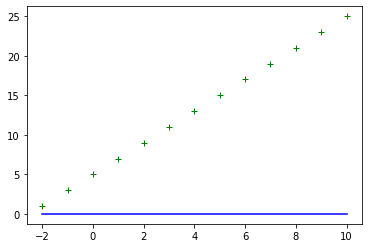

Model= [0.026000000000000002, 0.16]
Iteration =  100


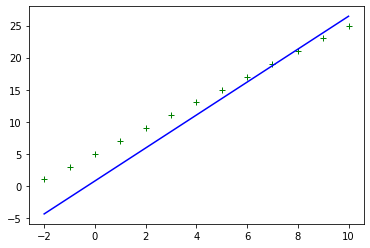

Model= [0.7662231363608235, 2.568660434496728]
Iteration =  200


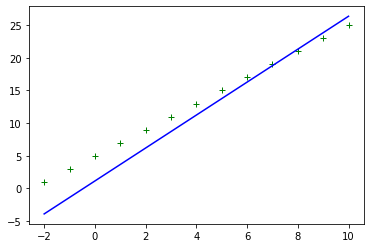

Model= [1.1378271149418557, 2.5229384290384913]
Iteration =  300


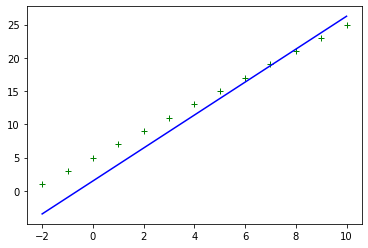

Model= [1.4763076593156945, 2.477115817477137]
Iteration =  400


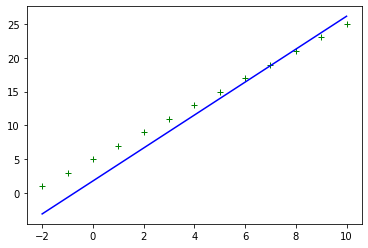

Model= [1.7851228649458646, 2.4353015625628647]
Iteration =  500


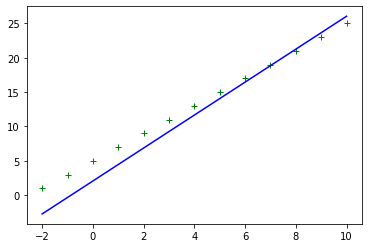

Model= [2.066873608641752, 2.397151881020124]
Iteration =  600


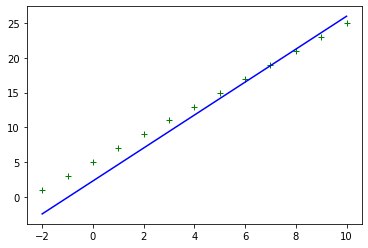

Model= [2.323931812545799, 2.362345624626674]
Iteration =  700


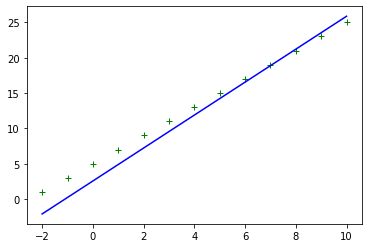

Model= [2.558461522488904, 2.33058977675955]
Iteration =  800


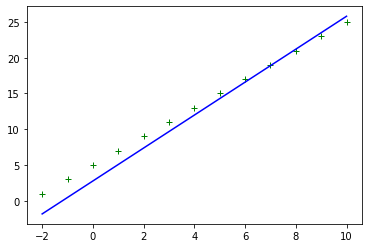

Model= [2.7724371280546003, 2.3016170006482906]
Iteration =  900


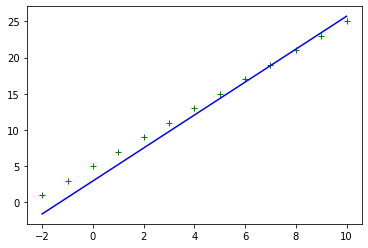

Model= [2.9676599839917617, 2.2751833888264446]
Iteration =  1500


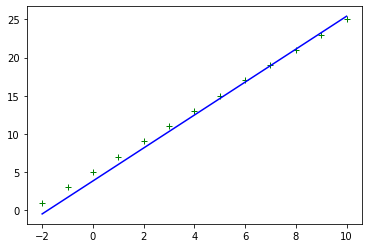

Model= [3.8278187924115525, 2.1587159601651797]
Iteration =  2000


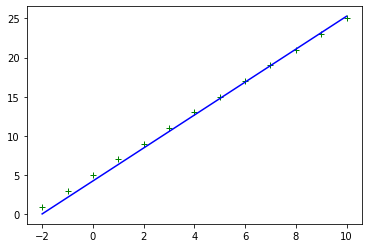

Model= [4.258985437352481, 2.100335031005099]
Iteration =  2500


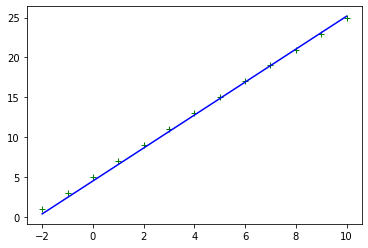

Model= [4.531554866687065, 2.063428519956765]
Iteration =  3000


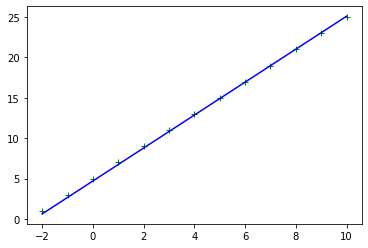

Model= [4.703864331436965, 2.0400974326075714]
Iteration =  3500


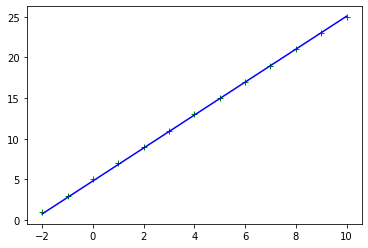

Model= [4.812792730762142, 2.025348283434877]
Iteration =  4000


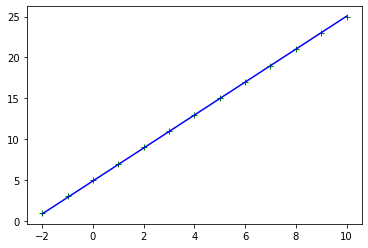

Model= [4.881653696680459, 2.0160243544613756]
Iteration =  4500


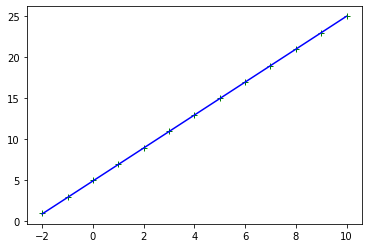

Model= [4.9251853436759205, 2.010130071985485]
Iteration =  5000


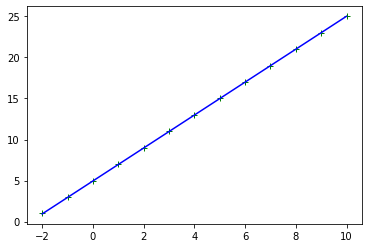

Model= [4.952704624953274, 2.0064038996814806]
Iteration =  5500


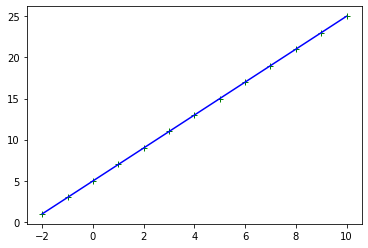

Model= [4.970101413135939, 2.0040483356080028]
Iteration =  6000


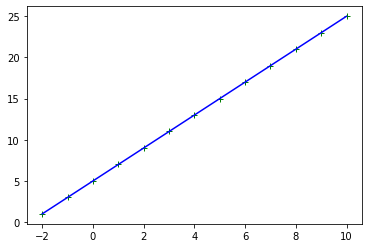

Model= [4.981099092763626, 2.002559225161258]
Iteration =  6500


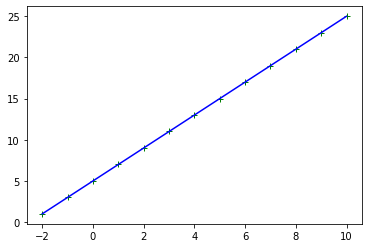

Model= [4.988051465576544, 2.0016178583151722]
Iteration =  7000


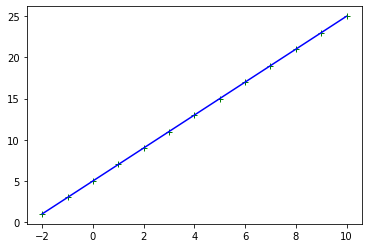

Model= [4.992446527932067, 2.0010227570311496]
Iteration =  7500


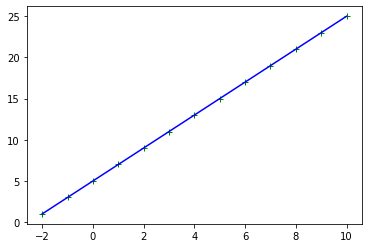

Model= [4.995224942385486, 2.0006465534929454]
Iteration =  8000


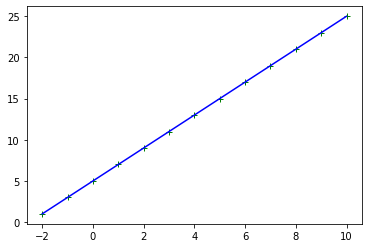

Model= [4.996981364991248, 2.0004087299392794]
Iteration =  8500


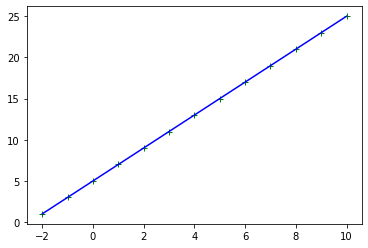

Model= [4.998091717828, 2.000258385678967]
Iteration =  9000


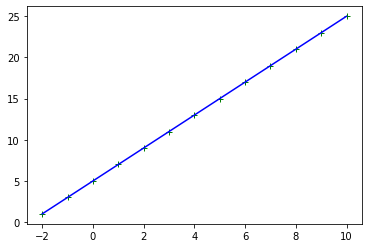

Model= [4.99879364651989, 2.0001633429623804]
Iteration =  9500


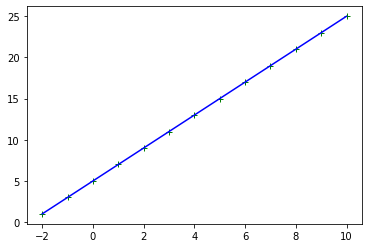

Model= [4.999237382846035, 2.00010326007024]
Iteration =  10000


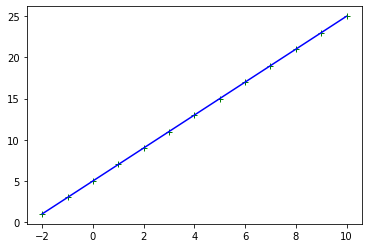

Model= [4.999517898416083, 2.000065277633947]
Iteration =  10500


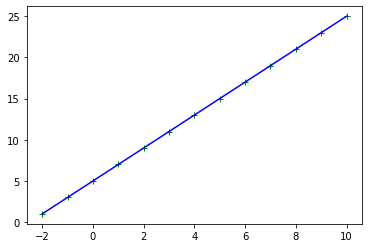

Model= [4.999695231170703, 2.0000412663819023]
Iteration =  11000


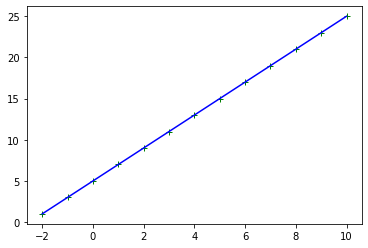

Model= [4.999807335129344, 2.0000260872548874]
Iteration =  11500


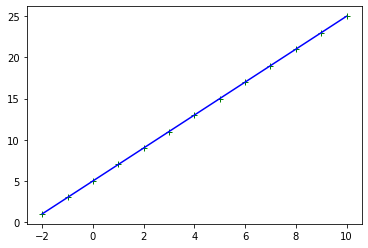

Model= [4.999878203579838, 2.000016491508007]
Iteration =  12000


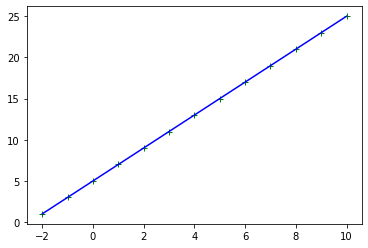

Model= [4.99992300429282, 2.0000104253911553]
Iteration =  12500


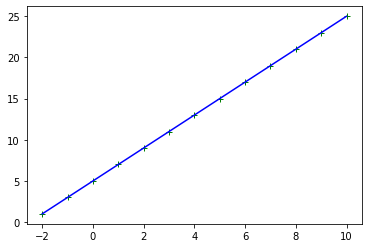

Model= [4.9999513258360455, 2.000006590590787]
Iteration =  13000


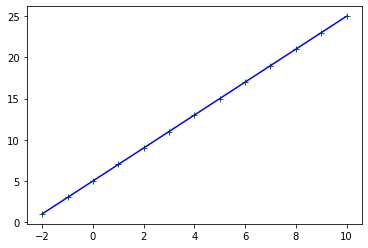

Model= [4.999969229787957, 2.0000041663556094]
Iteration =  13500


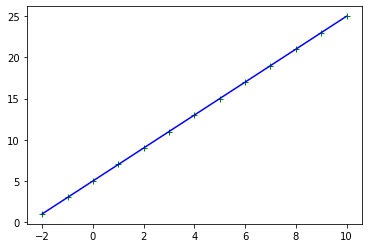

Model= [4.999980548079879, 2.0000026338335397]
Iteration =  14000


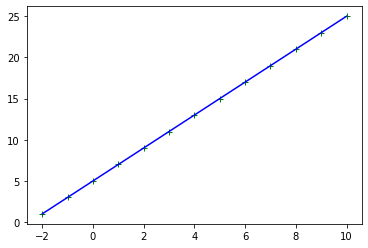

Model= [4.999987703133284, 2.000001665023288]
Iteration =  14500


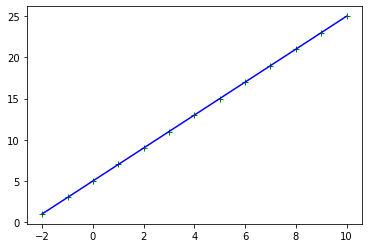

Model= [4.999992226323667, 2.0000010525731815]
Iteration =  15000


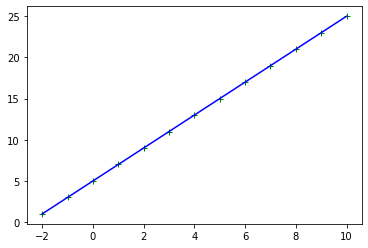

Model= [4.999995085736462, 2.000000665402287]
Iteration =  15500


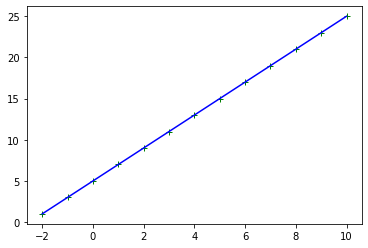

Model= [4.9999968933635595, 2.0000004206455304]
Iteration =  16000


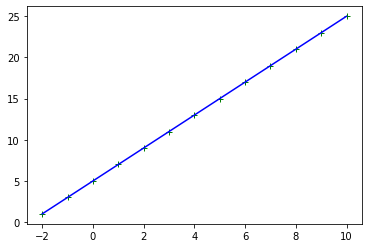

Model= [4.999998036086199, 2.000000265918326]
Iteration =  16500


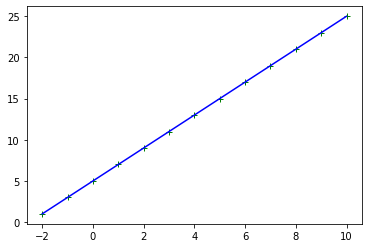

Model= [4.999998758478022, 2.000000168104856]
Iteration =  17000


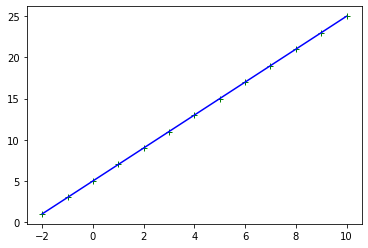

Model= [4.999999215150475, 2.0000001062703836]
Iteration =  17500


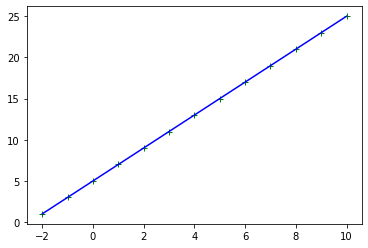

Model= [4.9999995038438465, 2.0000000671806535]
Iteration =  18000


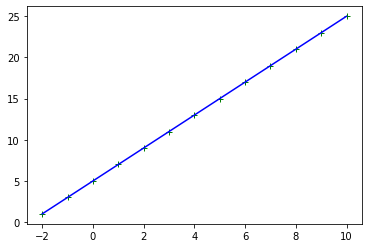

Model= [4.999999686346333, 2.0000000424694084]
Iteration =  18500


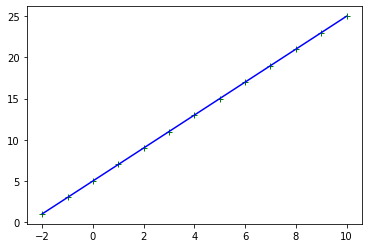

Model= [4.999999801718421, 2.0000000268477693]
Iteration =  19000


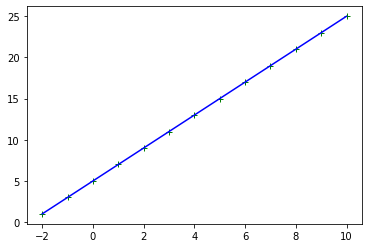

Model= [4.999999874652884, 2.00000001697228]
Iteration =  19500


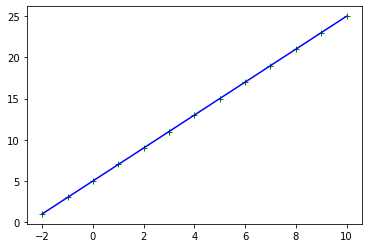

Model= [4.999999920759657, 2.00000001072932]
Iteration =  20000


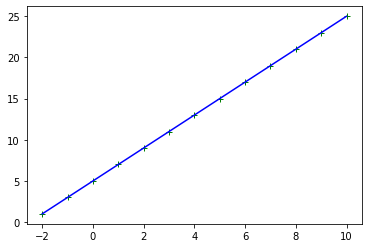

Model= [4.9999999499068455, 2.000000006782725]
Iteration =  20500


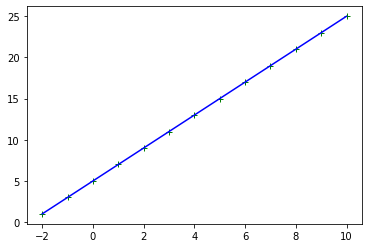

Model= [4.999999968332749, 2.0000000042878168]
Iteration =  21000


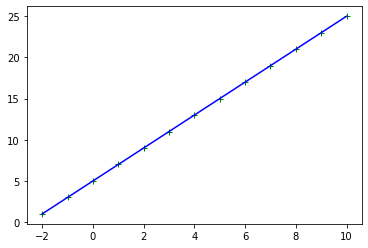

Model= [4.999999979981001, 2.0000000027106175]
Iteration =  21500


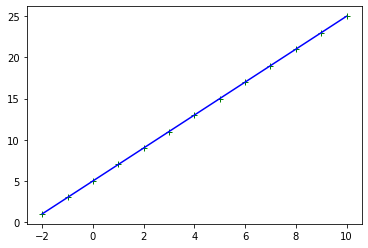

Model= [4.9999999873446335, 2.000000001713565]
Iteration =  22000


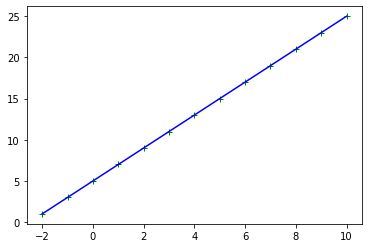

Model= [4.999999991999691, 2.00000000108326]
Iteration =  22500


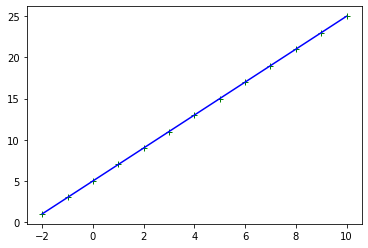

Model= [4.999999994942469, 2.0000000006848007]
Iteration =  23000


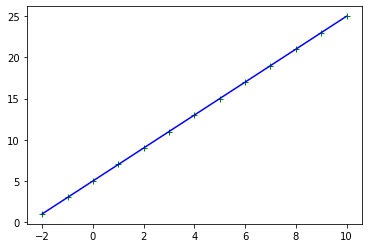

Model= [4.999999996802792, 2.000000000432909]
Iteration =  23500


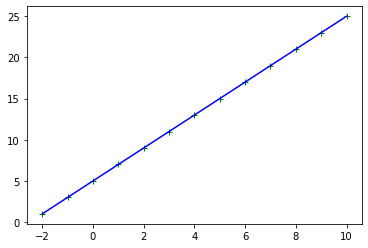

Model= [4.999999997978825, 2.0000000002736718]
Iteration =  24000


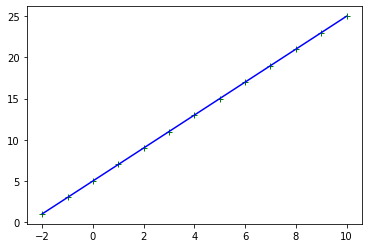

Model= [4.99999999872228, 2.000000000173006]
Iteration =  24500


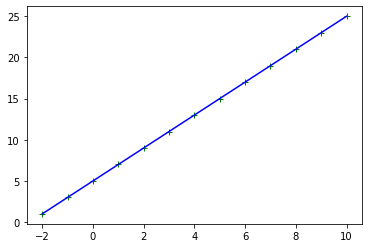

Model= [4.9999999991922675, 2.0000000001093694]
Iteration =  25000


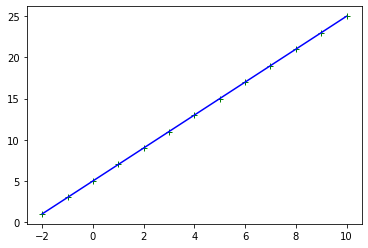

Model= [4.999999999489374, 2.0000000000691402]
Iteration =  25500


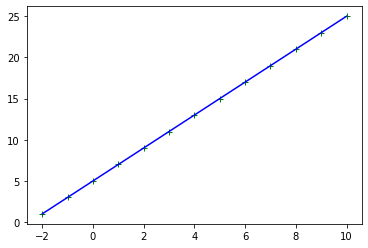

Model= [4.999999999677201, 2.000000000043708]
Iteration =  26000


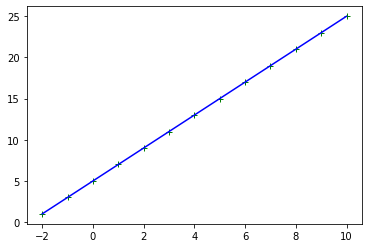

Model= [4.999999999795938, 2.0000000000276312]
Iteration =  26500


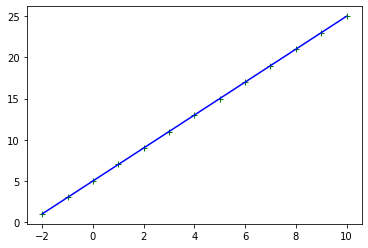

Model= [4.999999999870996, 2.000000000017469]
Iteration =  27000


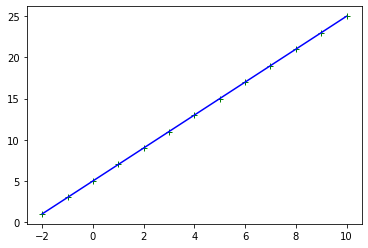

Model= [4.999999999918444, 2.0000000000110445]
Iteration =  27500


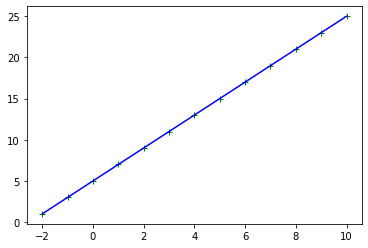

Model= [4.999999999948437, 2.0000000000069824]
Iteration =  28000


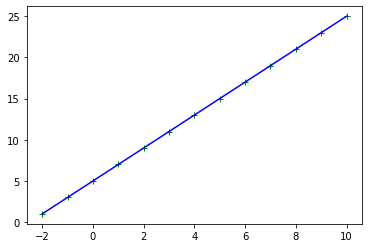

Model= [4.9999999999673985, 2.000000000004417]
Iteration =  28500


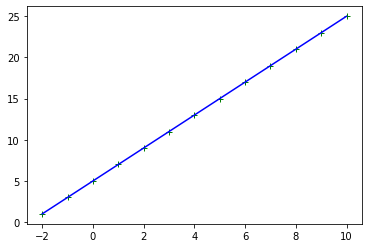

Model= [4.999999999979383, 2.0000000000027915]
Iteration =  29000


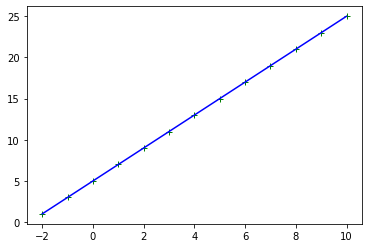

Model= [4.999999999986965, 2.000000000001764]
Iteration =  29500


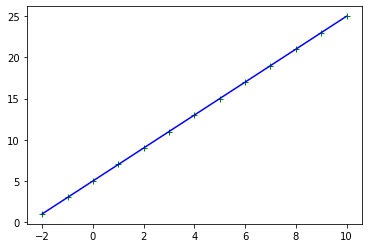

Model= [4.9999999999917595, 2.000000000001117]
Iteration =  30000


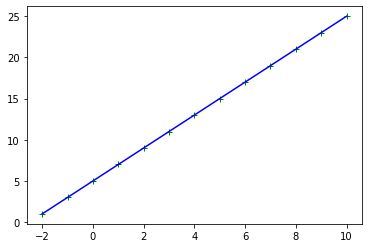

Model= [4.999999999994784, 2.0000000000007065]
Iteration =  30500


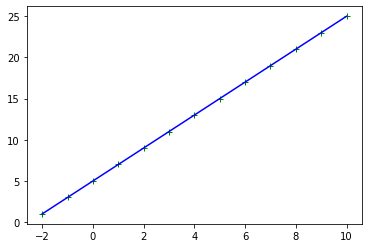

Model= [4.99999999999669, 2.0000000000004485]
Iteration =  31000


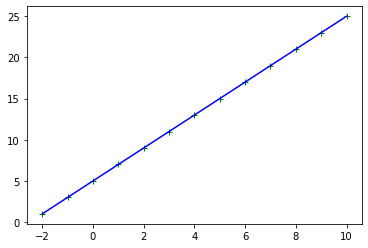

Model= [4.999999999997878, 2.0000000000002864]
Iteration =  31500


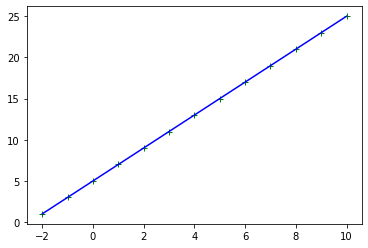

Model= [4.999999999998654, 2.000000000000183]
Iteration =  32000


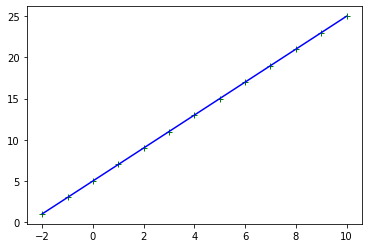

Model= [4.9999999999990985, 2.000000000000124]
Error = 1.548090025474433e-24


In [241]:
no_noise_data = [((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]
model = linear_main(no_noise_data, [0, 0], 0.001)

#### Noise Data

Iteration =  0


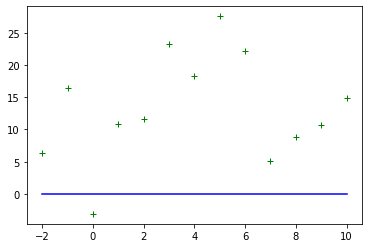

Model= [0.026613846153846158, 0.11843538461538461]
Iteration =  100


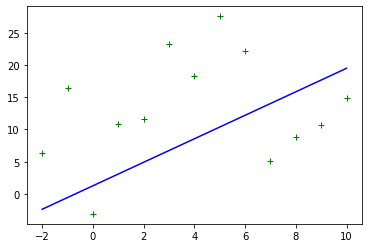

Model= [1.2676150785928535, 1.8228402445821945]
Iteration =  200


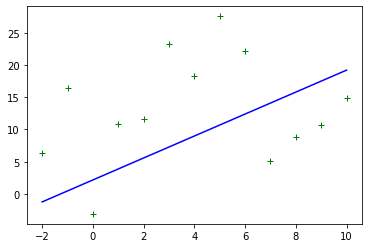

Model= [2.1731627914392053, 1.7036556650839112]
Iteration =  300


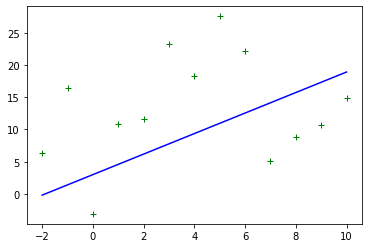

Model= [2.9989335143208486, 1.5918507383011753]
Iteration =  400


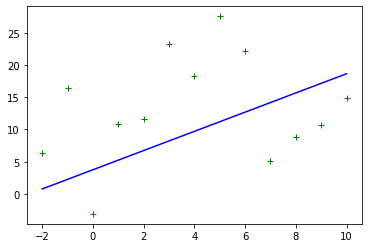

Model= [3.7523332105436458, 1.4898387439739222]
Iteration =  500


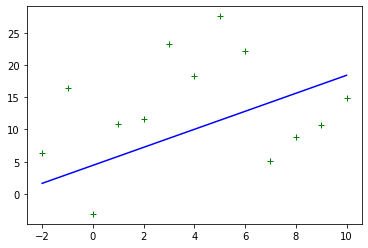

Model= [4.439705211067504, 1.3967670360137021]
Iteration =  600


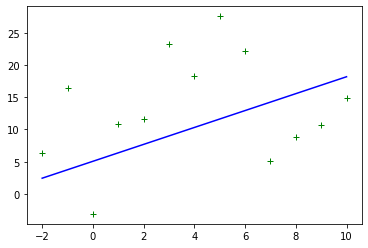

Model= [5.066836162178475, 1.3118521010100848]
Iteration =  700


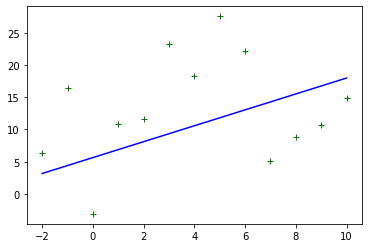

Model= [5.639005569054525, 1.2343790821614855]
Iteration =  800


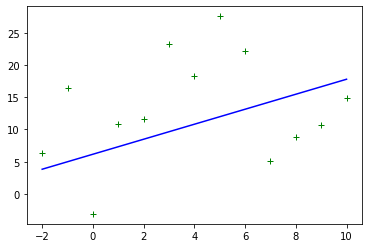

Model= [6.161030242824726, 1.163695772455635]
Iteration =  900


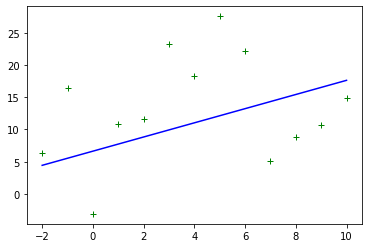

Model= [6.637304850921553, 1.099207124081976]
Iteration =  1500


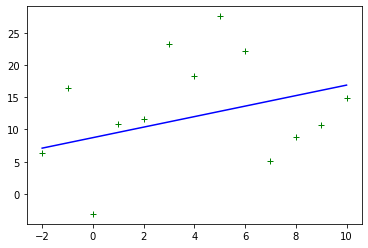

Model= [8.73578762034193, 0.8150678583417778]
Iteration =  2000


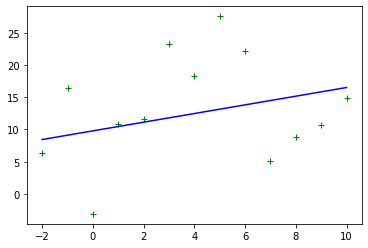

Model= [9.787681487265806, 0.6726390734407119]
Iteration =  2500


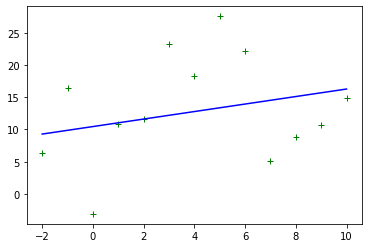

Model= [10.452654333361682, 0.5826002611234483]
Iteration =  3000


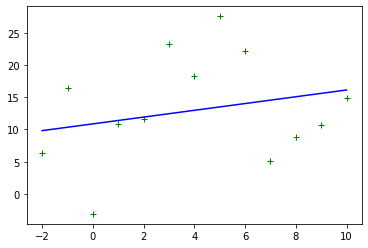

Model= [10.873028384346501, 0.5256806733509694]
Iteration =  3500


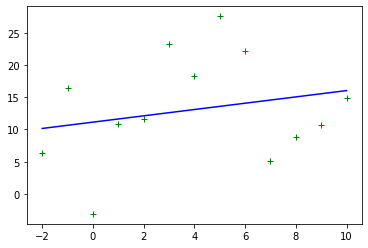

Model= [11.13877508931181, 0.4896979744591517]
Iteration =  4000


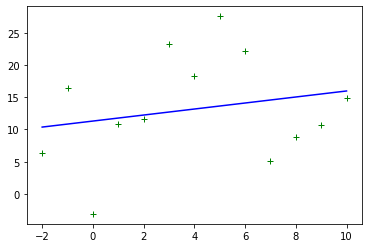

Model= [11.306771451205378, 0.46695089089427316]
Iteration =  4500


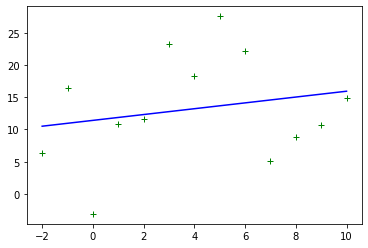

Model= [11.41297324818782, 0.4525709297839827]
Iteration =  5000


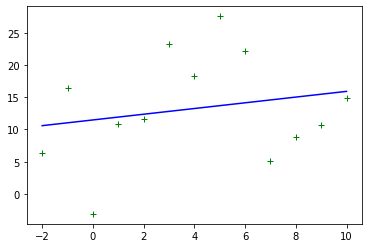

Model= [11.480110545419556, 0.44348038941015044]
Iteration =  5500


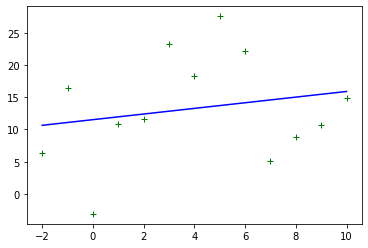

Model= [11.522552545533056, 0.43773364756193095]
Iteration =  6000


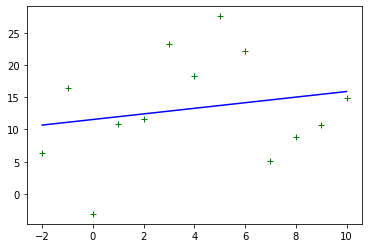

Model= [11.549382987744895, 0.43410074560979195]
Iteration =  6500


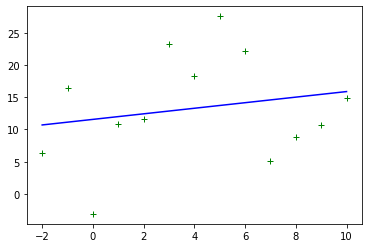

Model= [11.566344314434419, 0.4318041439975366]
Iteration =  7000


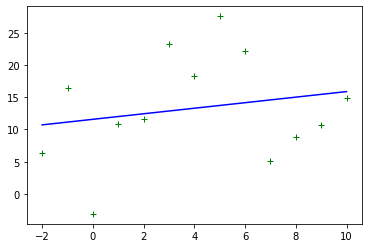

Model= [11.577066709570442, 0.43035230768735944]
Iteration =  7500


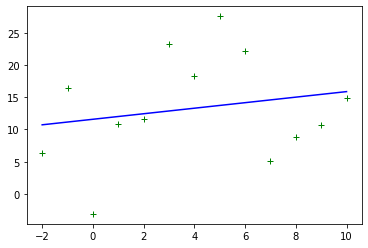

Model= [11.58384505654512, 0.4294345043294366]
Iteration =  8000


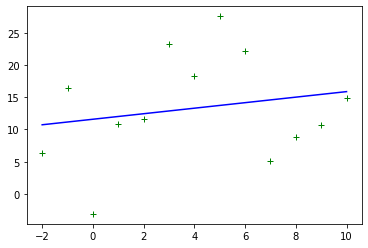

Model= [11.588130105466231, 0.42885429911076733]
Iteration =  8500


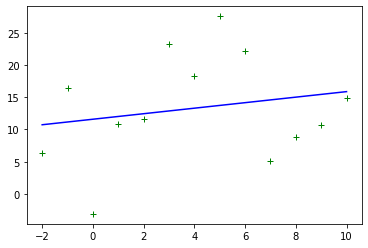

Model= [11.590838973030081, 0.42848751237713456]
Iteration =  9000


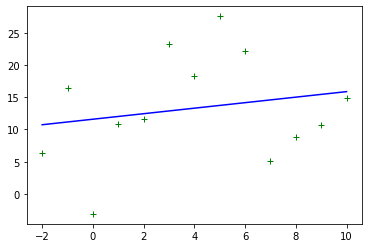

Model= [11.592551430370381, 0.4282556418188562]
Iteration =  9500


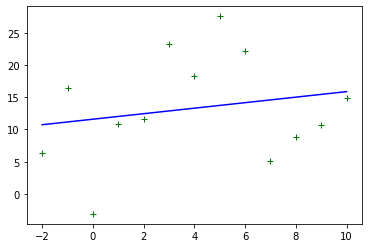

Model= [11.593633989806458, 0.4281090608472279]
Iteration =  10000


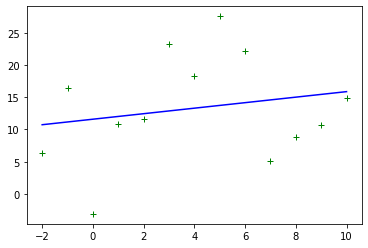

Model= [11.594318348420872, 0.4280163971584734]
Iteration =  10500


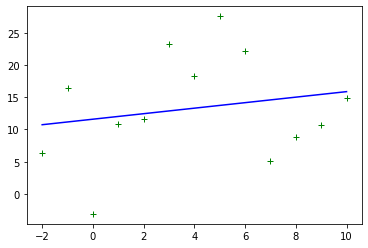

Model= [11.594750977519585, 0.42795781820979784]
Iteration =  11000


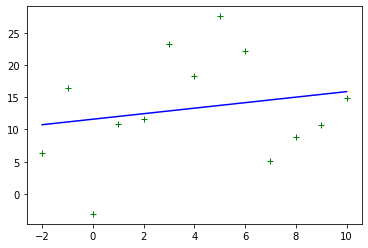

Model= [11.595024471464297, 0.42792078651729726]
Iteration =  11500


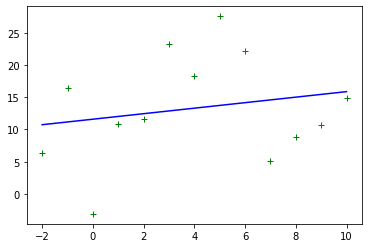

Model= [11.595197365377363, 0.4278973762943369]
Iteration =  12000


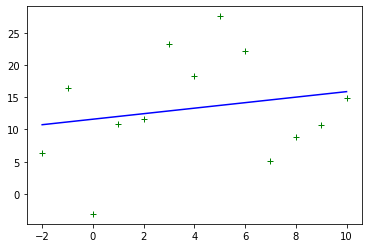

Model= [11.59530666324577, 0.4278825771182236]
Iteration =  12500


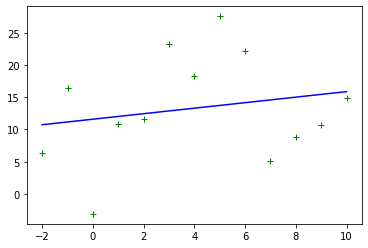

Model= [11.595375757777951, 0.4278732215638551]
Iteration =  13000


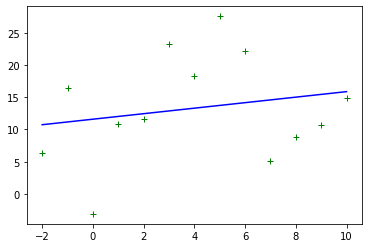

Model= [11.595419437077886, 0.4278673072888404]
Iteration =  13500


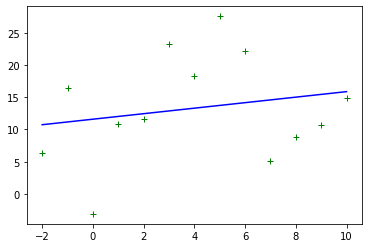

Model= [11.595447049700505, 0.4278635684779096]
Iteration =  14000


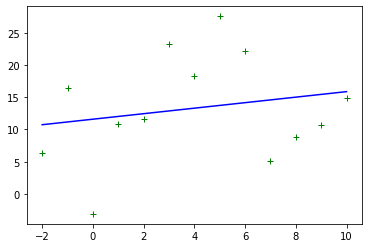

Model= [11.59546450549602, 0.4278612049241117]
Iteration =  14500


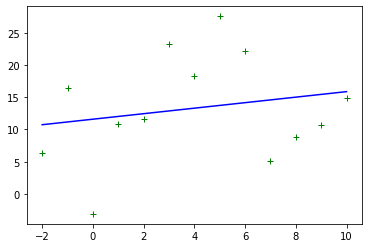

Model= [11.59547554047817, 0.42785971076282003]
Iteration =  15000


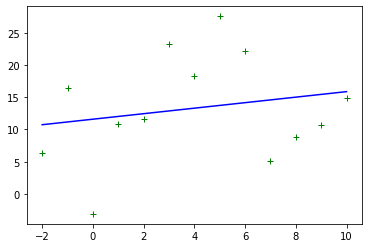

Model= [11.595482516432407, 0.4278587662029961]
Iteration =  15500


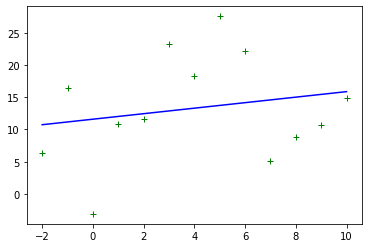

Model= [11.595486926402167, 0.42785816908321606]
Error = 805.7044412089517


In [242]:
noise_data = [((1, -2), 6.39), ((1, -1), 16.51), ((1, 0), -3.11), ((1, 1), 10.79), ((1, 2), 11.62), ((1, 3), 23.24), ((1, 4), 18.27), ((1, 5), 27.58), ((1, 6), 22.21), ((1, 7), 5.12), ((1, 8), 8.86), ((1, 9), 10.69), ((1, 10), 14.82)]
model = linear_main(noise_data, [0, 0], 0.001)


#Logistic Regression

In [243]:
def sigmoid(y): # this function is required since we are doing a binary classification, all inputs are between 0 and 1
  return (1/(1+math.exp(-y)))

def get_sigmoid(model, inputs): # gets the sigmoid values for all inputs based on the current model
  return[sigmoid(y) for y in get_model(model,inputs)]

def classify(y): # 1 if greater is sigmoid returns > 0.5 otherwise 0
  if y > 0.5:
    return 1
  else:
    return 0

# not sure on how to plot the best fit line
def plot_log(data,model): # plots the inputs 
  inputs, real_class = [list(x) for x in zip(*data)]
  
  xS = []
  yS = []

  for i in range(len(real_class)):
    xS.append(inputs[i][1])
    yS.append(inputs[i][2])
  
  #print(xS, yS)
  plt.scatter(xS, yS, c = real_class)

  # ------- this is inspired by another notebook 
  xMin = min(xS)
  xMax = max(xS)
  multiplier = (-model[0] / model[2]) - (model[1] / model[2]) # where is this from
  isFloats = any(isinstance(x, float) for x in xS) #only for 4th dataset with floats
  if isFloats:
    xCoords = sorted(set(xS))
  else:
    xCoords = list(range(xMin, xMax + 1))
  
  yCoords = [((-model[0] / model[2]) - (model[1] / model[2]) * x) for x in xCoords]
  
  plt.plot(xCoords, yCoords, "r") 

  plt.show() 

  
def logistic_main(data, model, lr):
  prev_error = float('inf')
  error = 0
  iterations = 0
  learning_rate = lr
  inputs, real_class = [list(x) for x in zip(*data)]

  # this will contiue as long as the margin of error between the next 
  # error calculated is greater than 0.00001, again this is arbritary 
  # since if i used linear logic it would run for long time
  while (prev_error - error > 0.00001 and iterations < 100000): 
    prev_error = error
    classified = get_sigmoid(model, inputs) # get current list of predicted values from sigmoid 
    error = cross_entropy(real_class, classified) # cross entropy loss used instead of squred error
    delta = get_delta(real_class, classified, inputs) # gets current delta
    model = update_model(model, delta, learning_rate) # gets current model 
    
    if(prev_error == 0): # again to contine after first iteration
      prev_error = error + learning_rate

    if(iterations % 1000 == 0 and iterations < 10000):
      print("Iteration =", iterations)
      print("Model =", model)
      plot_log(data, model)
    elif(iterations % 5000 == 0 and iterations > 10000):
      print("Iteration =", iterations)
      print("Model =", model)
      plot_log(data, model)
    
    iterations += 1
  
  plot_log(data, model)

  print("Error =", error)
  print("Total iterations =", iterations)

  return model

#### Data 1

Iteration = 0
Model = [0.0002, 0.003, -0.0017333333333333335]


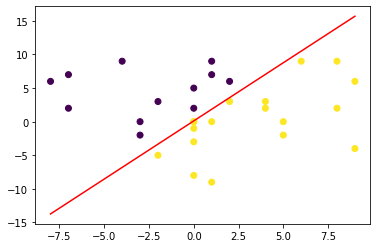

Iteration = 1000
Model = [0.14607129117469062, 0.7015535132339729, -0.3826508721874241]


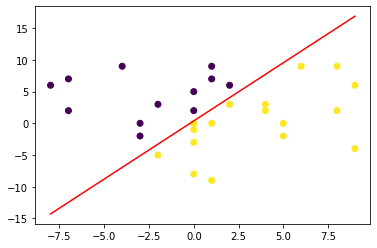

Iteration = 2000
Model = [0.2571881065633326, 0.9414690125474028, -0.5199834137734027]


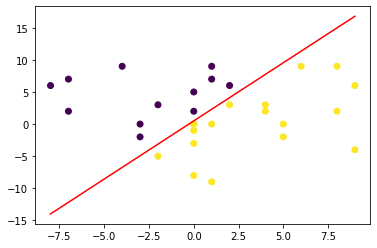

Iteration = 3000
Model = [0.3535172415345544, 1.10718404853303, -0.6167271945876125]


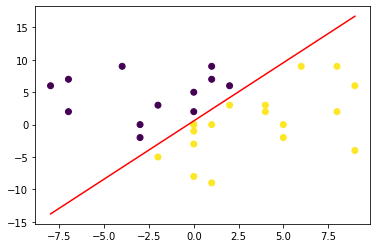

Iteration = 4000
Model = [0.438974815128575, 1.237405382235638, -0.6936621465908056]


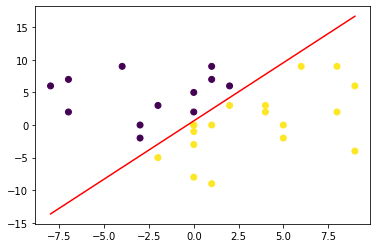

Iteration = 5000
Model = [0.5158130743982853, 1.346155919017803, -0.7584728228079146]


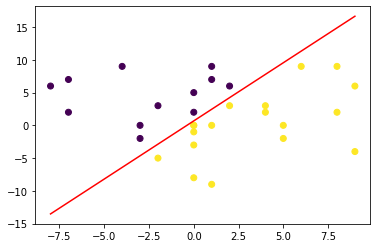

Iteration = 6000
Model = [0.585601769826553, 1.4403030801034493, -0.8149740282459893]


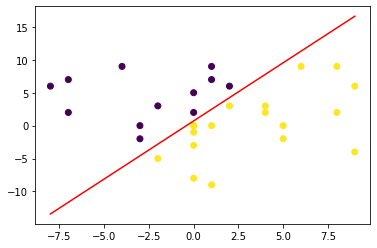

Iteration = 7000
Model = [0.6495087140593435, 1.5237808855401374, -0.8653688933110074]


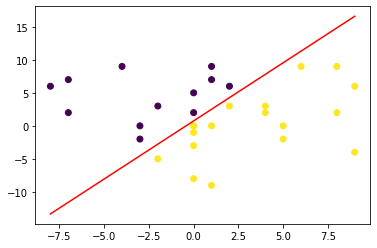

Iteration = 8000
Model = [0.7084334659440507, 1.5990750884127425, -0.9110563884390297]


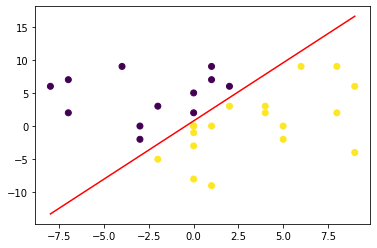

Iteration = 9000
Model = [0.7630856283409776, 1.6678661656349563, -0.9529854228465656]


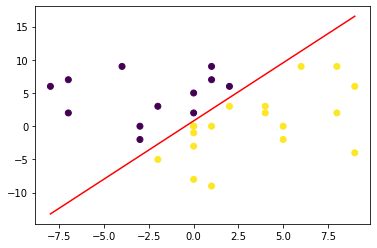

Iteration = 15000
Model = [1.0270305702374987, 1.9937601268987046, -1.1538343568658813]


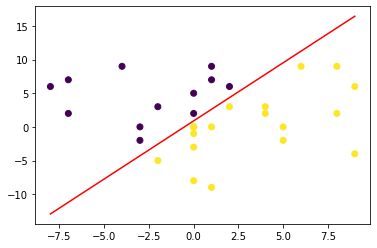

Iteration = 20000
Model = [1.1927811106548611, 2.1985970287273284, -1.2816327759593842]


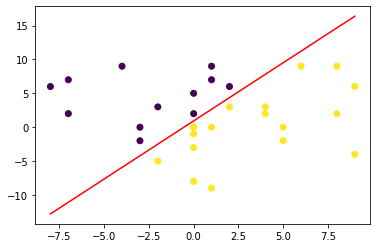

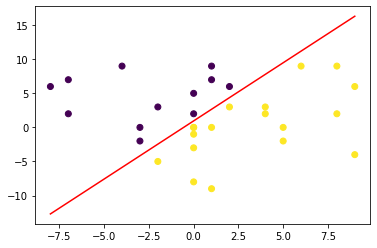

Error = 0.3443661219302648
Total iterations = 24387
model = [1.3132291162398473, 2.3494082064526896, -1.3763022140003907]


In [244]:
data = [((1, 0, 0), 1), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 1), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 0), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]
model = logistic_main(data, [0,0,0], 0.001)

print("model =", model)

#### Data 2

Iteration = 0
Model = [0.00013333333333333334, 0.003, -0.0016]


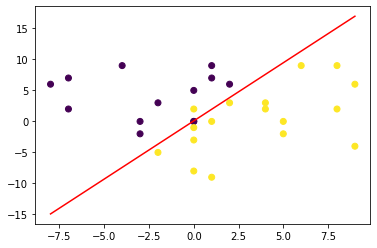

Iteration = 1000
Model = [0.08031046817687369, 0.6813496256714413, -0.344253016705313]


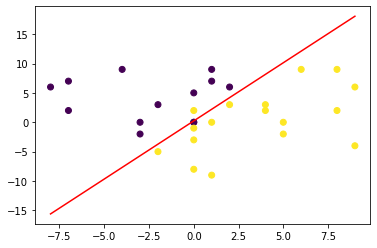

Iteration = 2000
Model = [0.13320834123741251, 0.8961929530218127, -0.45447369376724345]


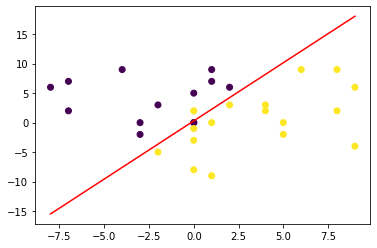

Iteration = 3000
Model = [0.17704162107687585, 1.0362497429392865, -0.5264711245303272]


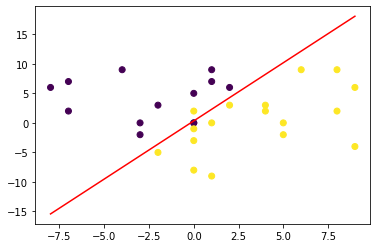

Iteration = 4000
Model = [0.21448715278273137, 1.1407728221373181, -0.5801423051169436]


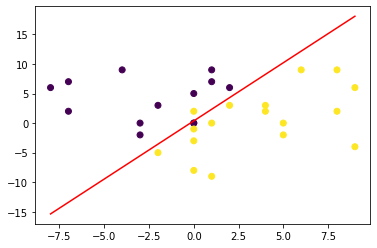

Iteration = 5000
Model = [0.24689383004767987, 1.2239633338363178, -0.6227303036817937]


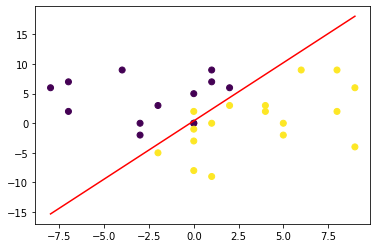

Iteration = 6000
Model = [0.27516897158274284, 1.2927526078733713, -0.6578014237353681]


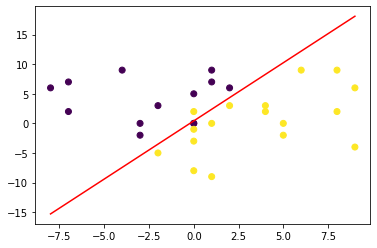

Iteration = 7000
Model = [0.29998689186471167, 1.3510977634418762, -0.6874079220110278]


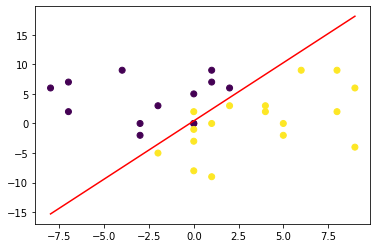

Iteration = 8000
Model = [0.32187277761350147, 1.4014921920647214, -0.7128512970606825]


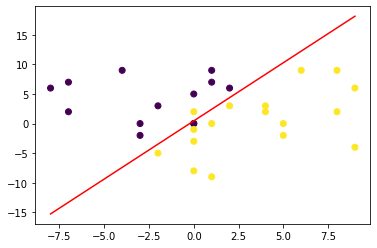

Iteration = 9000
Model = [0.34124719444170953, 1.445618072357734, -0.7350140125146194]


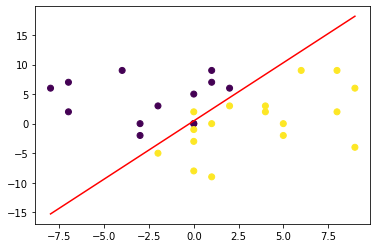

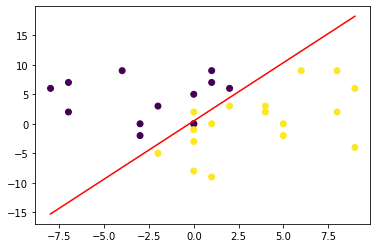

Error = 1.1112505528883605
Total iterations = 11849
model = [0.3854714152636442, 1.5462966013000543, -0.7850883846604929]


In [245]:
data = [((1, 0, 0), 0), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 0), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 1), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]
model = logistic_main(data, [0,0,0], 0.001)

print("model =", model)

#### Data 3

Iteration = 0
Model = [6.666666666666667e-05, 0.032299999999999995, -0.018866666666666667]


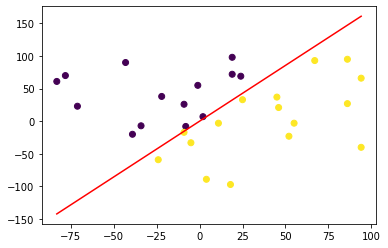

Iteration = 1000
Model = [0.007065271263926568, 0.38527014713442365, -0.23434322388701262]


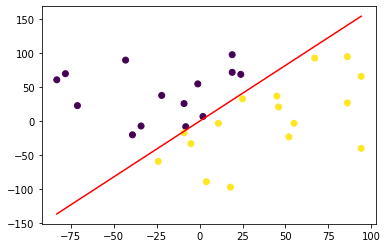

Iteration = 2000
Model = [0.007337147646541834, 0.5034533513312942, -0.3150425111711662]


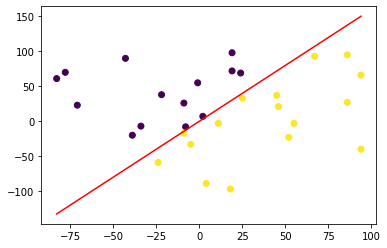

Iteration = 3000
Model = [0.007590212096955041, 0.5947605416694371, -0.37810328441106]


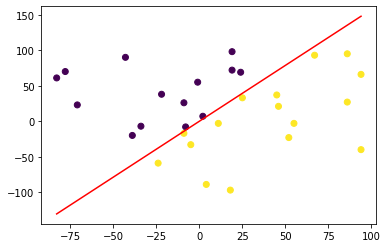

Iteration = 4000
Model = [0.007988456129759078, 0.6705028883645573, -0.4304161111352786]


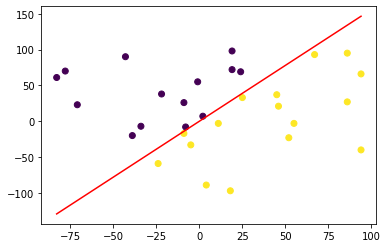

Iteration = 5000
Model = [0.00847834592758613, 0.7352170674342955, -0.4750516512516279]


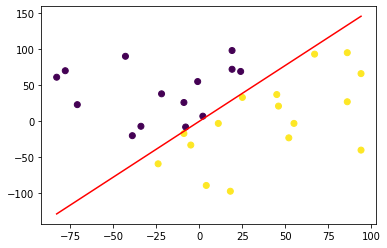

Iteration = 6000
Model = [0.009013982011002937, 0.7915964904472723, -0.5138858126494437]


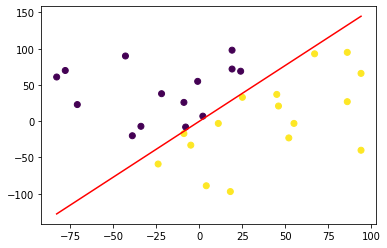

Iteration = 7000
Model = [0.009567328338766608, 0.8414535664882354, -0.5481875481224208]


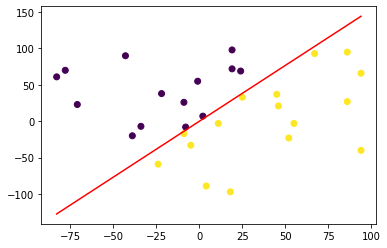

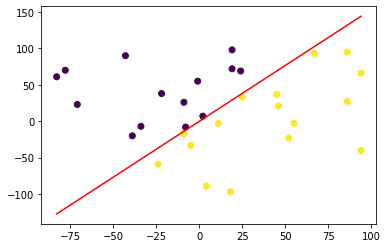

Error = 0.08964133637171975
Total iterations = 7346
model = [0.009759169458253687, 0.8573862690656099, -0.5591417579376186]


In [246]:
data = [((1, 2, 7), 0), ((1, 19, 72), 0), ((1, -39, -20), 0), ((1, 86, 95), 1), ((1, 45, 37), 1), ((1, 52, -23), 1), ((1, -8, -8), 0), ((1, 67, 93), 1), ((1, 46, 21), 1), ((1, 18, -97), 1), ((1, -78, 70), 0), ((1, -9, -17), 1), ((1, 94, -40), 1), ((1, 11, -3), 1), ((1, -24, -59), 1), ((1, 25, 33), 1), ((1, -71, 23), 0), ((1, -34, -7), 0), ((1, 55, -3), 1), ((1, -5, -33), 1), ((1, -22, 38), 0), ((1, 94, 66), 1), ((1, 4, -89), 1), ((1, -9, 26), 0), ((1, -83, 61), 0), ((1, 19, 98), 0), ((1, -1, 55), 0), ((1, -43, 90), 0), ((1, 86, 27), 1), ((1, 24, 69), 0)]
model = logistic_main(data, [0,0,0], 0.001)

print("model =", model)

#### Data 4

##### Since our logistic regression is binary, 3 classes are not directly possible so I looked it up and people used One vs All where we do binary for each class.

In [247]:
def to_binary_first(data):
  return [(x, 1 if y > 0 else 0) for x, y in data]

def to_binary_second(data):
  return [(x, 1 if (y == 0 or y == 2) else 0) for x, y in data]
  
def to_binary_third(data):
  return [(x, 1 if (y == 0 or y == 1) else 0) for x, y in data]

data_4 = [((1, 5.1, 3.5), 0), ((1, 4.9, 3.0), 0), ((1, 4.7, 3.2), 0), ((1, 4.6, 3.1), 0), ((1, 5.0, 3.6), 0), ((1, 5.4, 3.9), 0), ((1, 4.6, 3.4), 0), ((1, 5.0, 3.4), 0), ((1, 4.4, 2.9), 0), ((1, 4.9, 3.1), 0), ((1, 5.4, 3.7), 0), ((1, 4.8, 3.4), 0), ((1, 4.8, 3.0), 0), ((1, 4.3, 3.0), 0), ((1, 5.8, 4.0), 0), ((1, 5.7, 4.4), 0), ((1, 5.4, 3.9), 0), ((1, 5.1, 3.5), 0), ((1, 5.7, 3.8), 0), ((1, 5.1, 3.8), 0), ((1, 5.4, 3.4), 0), ((1, 5.1, 3.7), 0), ((1, 4.6, 3.6), 0), ((1, 5.1, 3.3), 0), ((1, 4.8, 3.4), 0), ((1, 5.0, 3.0), 0), ((1, 5.0, 3.4), 0), ((1, 5.2, 3.5), 0), ((1, 5.2, 3.4), 0), ((1, 4.7, 3.2), 0), ((1, 4.8, 3.1), 0), ((1, 5.4, 3.4), 0), ((1, 5.2, 4.1), 0), ((1, 5.5, 4.2), 0), ((1, 4.9, 3.1), 0), ((1, 5.0, 3.2), 0), ((1, 5.5, 3.5), 0), ((1, 4.9, 3.6), 0), ((1, 4.4, 3.0), 0), ((1, 5.1, 3.4), 0), ((1, 5.0, 3.5), 0), ((1, 4.5, 2.3), 0), ((1, 4.4, 3.2), 0), ((1, 5.0, 3.5), 0), ((1, 5.1, 3.8), 0), ((1, 4.8, 3.0), 0), ((1, 5.1, 3.8), 0), ((1, 4.6, 3.2), 0), ((1, 5.3, 3.7), 0), ((1, 5.0, 3.3), 0), ((1, 7.0, 3.2), 1), ((1, 6.4, 3.2), 1), ((1, 6.9, 3.1), 1), ((1, 5.5, 2.3), 1), ((1, 6.5, 2.8), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 1), ((1, 4.9, 2.4), 1), ((1, 6.6, 2.9), 1), ((1, 5.2, 2.7), 1), ((1, 5.0, 2.0), 1), ((1, 5.9, 3.0), 1), ((1, 6.0, 2.2), 1), ((1, 6.1, 2.9), 1), ((1, 5.6, 2.9), 1), ((1, 6.7, 3.1), 1), ((1, 5.6, 3.0), 1), ((1, 5.8, 2.7), 1), ((1, 6.2, 2.2), 1), ((1, 5.6, 2.5), 1), ((1, 5.9, 3.2), 1), ((1, 6.1, 2.8), 1), ((1, 6.3, 2.5), 1), ((1, 6.1, 2.8), 1), ((1, 6.4, 2.9), 1), ((1, 6.6, 3.0), 1), ((1, 6.8, 2.8), 1), ((1, 6.7, 3.0), 1), ((1, 6.0, 2.9), 1), ((1, 5.7, 2.6), 1), ((1, 5.5, 2.4), 1), ((1, 5.5, 2.4), 1), ((1, 5.8, 2.7), 1), ((1, 6.0, 2.7), 1), ((1, 5.4, 3.0), 1), ((1, 6.0, 3.4), 1), ((1, 6.7, 3.1), 1), ((1, 6.3, 2.3), 1), ((1, 5.6, 3.0), 1), ((1, 5.5, 2.5), 1), ((1, 5.5, 2.6), 1), ((1, 6.1, 3.0), 1), ((1, 5.8, 2.6), 1), ((1, 5.0, 2.3), 1), ((1, 5.6, 2.7), 1), ((1, 5.7, 3.0), 1), ((1, 5.7, 2.9), 1), ((1, 6.2, 2.9), 1), ((1, 5.1, 2.5), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 2), ((1, 5.8, 2.7), 2), ((1, 7.1, 3.0), 2), ((1, 6.3, 2.9), 2), ((1, 6.5, 3.0), 2), ((1, 7.6, 3.0), 2), ((1, 4.9, 2.5), 2), ((1, 7.3, 2.9), 2), ((1, 6.7, 2.5), 2), ((1, 7.2, 3.6), 2), ((1, 6.5, 3.2), 2), ((1, 6.4, 2.7), 2), ((1, 6.8, 3.0), 2), ((1, 5.7, 2.5), 2), ((1, 5.8, 2.8), 2), ((1, 6.4, 3.2), 2), ((1, 6.5, 3.0), 2), ((1, 7.7, 3.8), 2), ((1, 7.7, 2.6), 2), ((1, 6.0, 2.2), 2), ((1, 6.9, 3.2), 2), ((1, 5.6, 2.8), 2), ((1, 7.7, 2.8), 2), ((1, 6.3, 2.7), 2), ((1, 6.7, 3.3), 2), ((1, 7.2, 3.2), 2), ((1, 6.2, 2.8), 2), ((1, 6.1, 3.0), 2), ((1, 6.4, 2.8), 2), ((1, 7.2, 3.0), 2), ((1, 7.4, 2.8), 2), ((1, 7.9, 3.8), 2), ((1, 6.4, 2.8), 2), ((1, 6.3, 2.8), 2), ((1, 6.1, 2.6), 2), ((1, 7.7, 3.0), 2), ((1, 6.3, 3.4), 2), ((1, 6.4, 3.1), 2), ((1, 6.0, 3.0), 2), ((1, 6.9, 3.1), 2), ((1, 6.7, 3.1), 2), ((1, 6.9, 3.1), 2), ((1, 5.8, 2.7), 2), ((1, 6.8, 3.2), 2), ((1, 6.7, 3.3), 2), ((1, 6.7, 3.0), 2), ((1, 6.3, 2.5), 2), ((1, 6.5, 3.0), 2), ((1, 6.2, 3.4), 2), ((1, 5.9, 3.0), 2)]

### 0 vs others

Iteration = 0
Model = [0.0003333333333333334, 0.002505999999999999, 0.0007719999999999998]


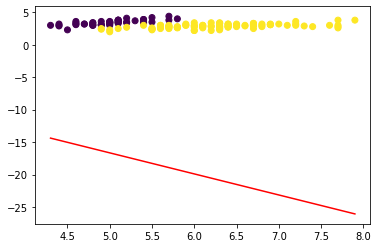

Iteration = 1000
Model = [-0.030897635662911115, 0.3156121835522589, -0.32623881465479443]


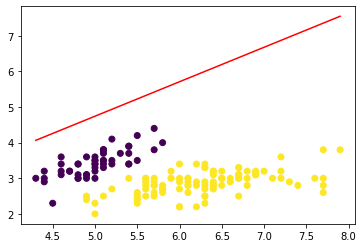

Iteration = 2000
Model = [-0.07376004934319555, 0.49870092405511757, -0.6560636838387519]


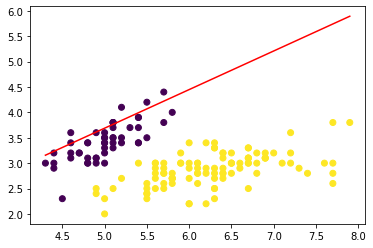

Iteration = 3000
Model = [-0.11169763873930917, 0.6601953803470352, -0.9431297010752451]


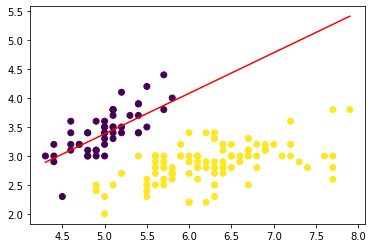

Iteration = 4000
Model = [-0.14570561597553106, 0.8035818145279673, -1.1954469196390727]


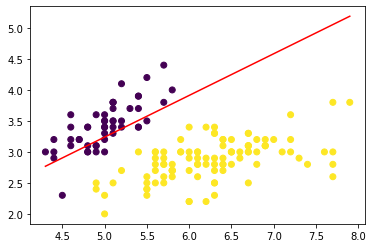

Iteration = 5000
Model = [-0.17655158880220773, 0.9319378977502483, -1.4195694656621685]


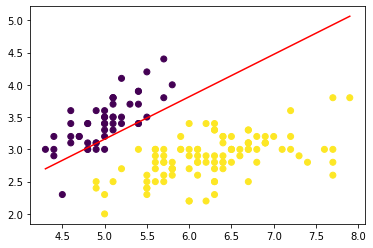

Iteration = 6000
Model = [-0.2048187585163311, 1.0478083741866557, -1.6206582294193652]


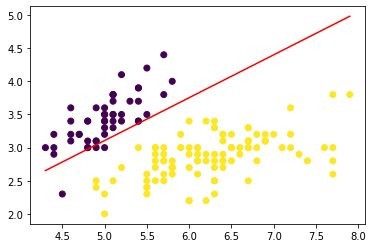

Iteration = 7000
Model = [-0.23095202909833687, 1.1532421477774024, -1.802732178515692]


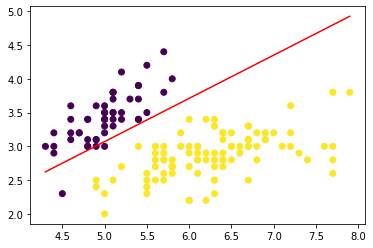

Iteration = 8000
Model = [-0.25529482825980987, 1.249876423368164, -1.9689271739564556]


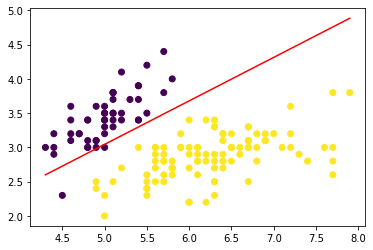

Iteration = 9000
Model = [-0.2781160814497388, 1.339021828263349, -2.121709736179005]


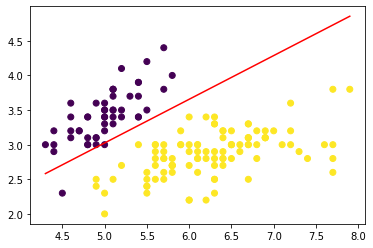

Iteration = 15000
Model = [-0.39263524523873256, 1.7640727127755356, -2.8440690758003155]


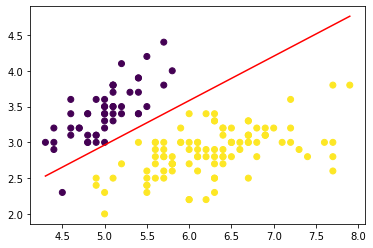

Iteration = 20000
Model = [-0.46935103614751295, 2.0276960887711275, -3.2876073679515048]


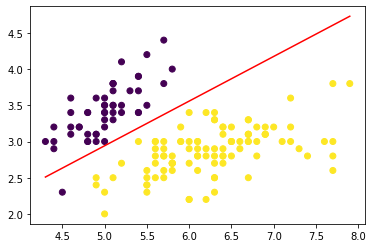

Iteration = 25000
Model = [-0.535819703578379, 2.242712762439045, -3.6470238394245182]


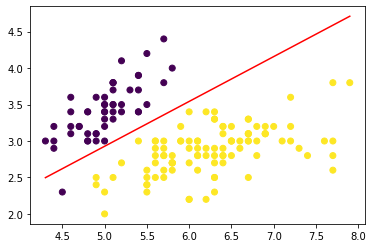

Iteration = 30000
Model = [-0.59522035048764, 2.424746006064749, -3.949682196916761]


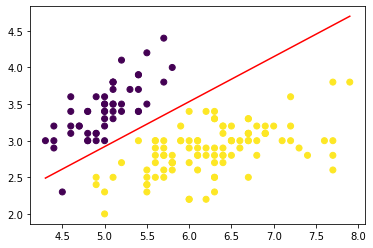

Iteration = 35000
Model = [-0.649433501700611, 2.582908253046045, -4.211427933199651]


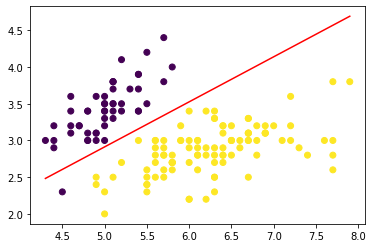

Iteration = 40000
Model = [-0.6996656257055567, 2.72297286638434, -4.442250634651715]


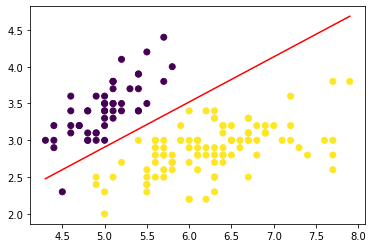

Iteration = 45000
Model = [-0.7467382159766749, 2.848828311597444, -4.648853658674887]


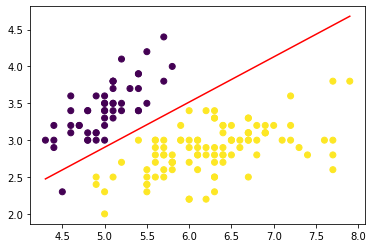

Iteration = 50000
Model = [-0.7912366811073668, 2.9632192887489333, -4.83595488460196]


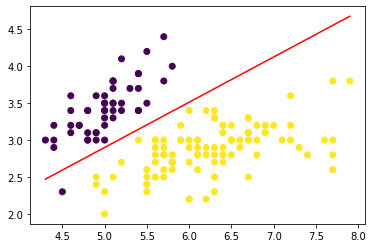

Iteration = 55000
Model = [-0.8335934567749189, 3.0681563144726187, -5.007002001639317]


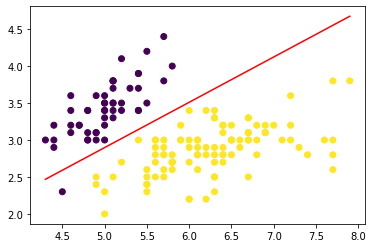

Iteration = 60000
Model = [-0.8741374111264842, 3.165156972080861, -5.164592212820288]


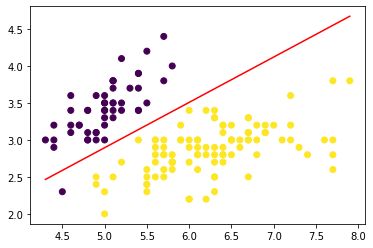

Iteration = 65000
Model = [-0.913124736041977, 3.2553955094637286, -5.310731691128599]


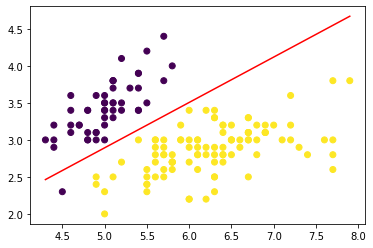

Iteration = 70000
Model = [-0.9507590813598842, 3.339799615928716, -5.447002997595792]


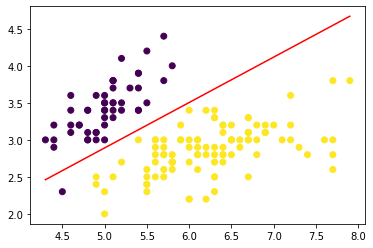

Iteration = 75000
Model = [-0.9872051419905891, 3.4191152885169034, -5.574677053722339]


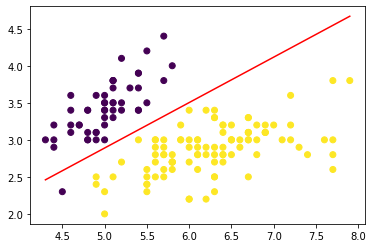

Iteration = 80000
Model = [-1.022598101544166, 3.4939516399189894, -5.694790344659367]


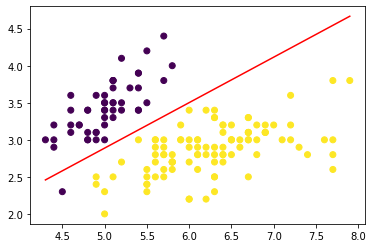

Iteration = 85000
Model = [-1.0570503648407934, 3.5648126634632162, -5.808199560063333]


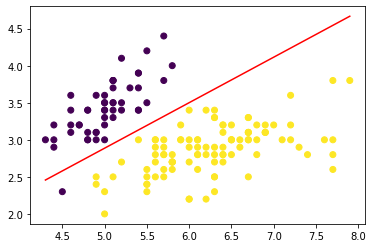

Iteration = 90000
Model = [-1.0906564647554857, 3.632120265038982, -5.915621155072857]


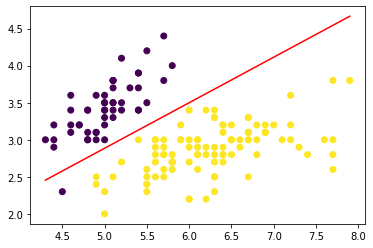

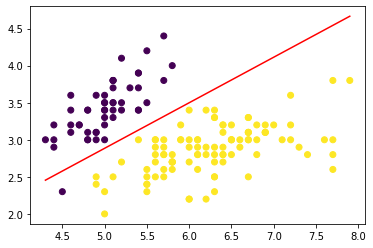

Error = 1.7087331940795838
Total iterations = 92868
Model = [-1.109576078916064, 3.6692518834950842, -5.974753886423399]


In [248]:
model_first = logistic_main(to_binary_first(data_4), [0,0,0], 0.001)
print("Model =", model_first)

### 1 vs others

Iteration = 0
Model = [0.0003333333333333334, 0.0018860000000000003, 0.0012106666666666665]


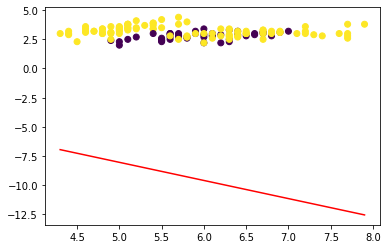

Iteration = 1000
Model = [0.012824035999409369, 0.0028453437857314644, 0.22055389890863256]


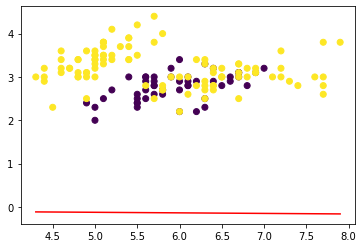

Iteration = 2000
Model = [0.007598386822874927, -0.07336878590506536, 0.37096875539834245]


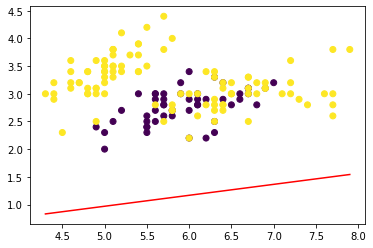

Iteration = 3000
Model = [0.00019561383332874414, -0.13904139383109396, 0.5024125959993002]


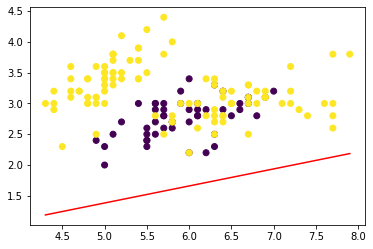

Iteration = 4000
Model = [-0.00906541121587274, -0.19589986602559914, 0.6178296644137039]


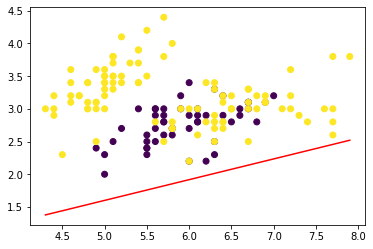

Iteration = 5000
Model = [-0.019912422449578807, -0.24536099284115995, 0.7196704977796475]


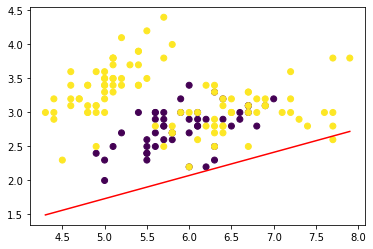

Iteration = 6000
Model = [-0.032115166453540255, -0.28858101214897164, 0.8099613802175494]


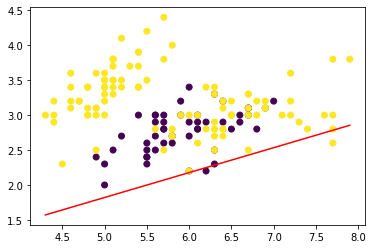

Iteration = 7000
Model = [-0.04547968832754272, -0.32650382421567187, 0.8903759134870837]


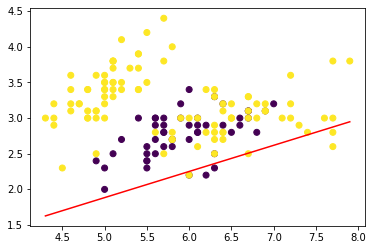

Iteration = 8000
Model = [-0.05984266474862877, -0.35990266939165194, 0.9622994247560076]


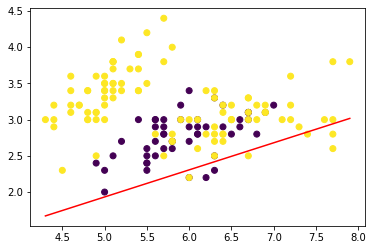

Iteration = 9000
Model = [-0.07506630005243703, -0.3894143311096805, 1.0268833657615695]


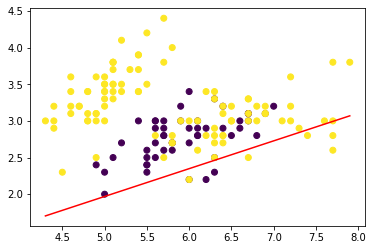

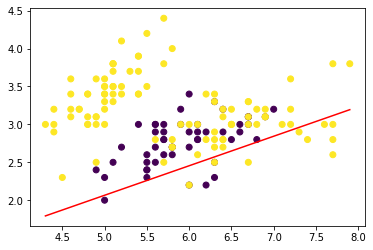

Error = 15.716241546871395
Total iterations = 13315
Model = [-0.14811526965023156, -0.4833018801378604, 1.2417611750034165]


In [250]:
model_second = logistic_main(to_binary_second(data_4), [0,0,0], 0.001)
print("Model =", model_second)

### 2 vs others

Iteration = 0
Model = [0.0003333333333333334, 0.0014513333333333375, 0.0010746666666666671]


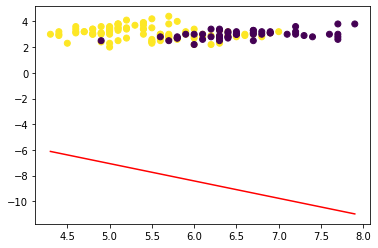

Iteration = 1000
Model = [0.074729487438985, -0.05808574072758642, 0.2706224214786518]


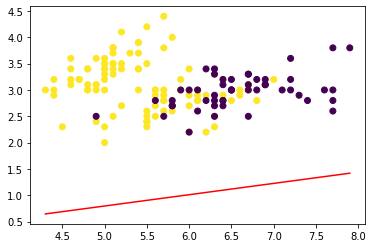

Iteration = 2000
Model = [0.13316005370799244, -0.1702006056363648, 0.4708087204545349]


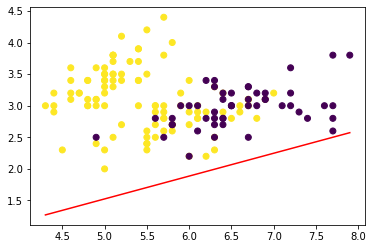

Iteration = 3000
Model = [0.18821288940495057, -0.2672060293923527, 0.6439882060788334]


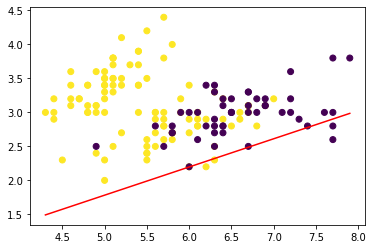

Iteration = 4000
Model = [0.2404039601545809, -0.35185893705395066, 0.7948581011268979]


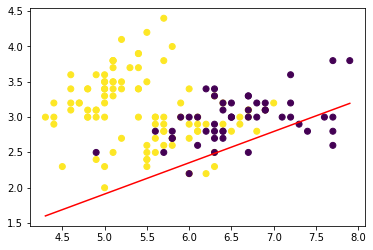

Iteration = 5000
Model = [0.29016592523098633, -0.4263671107166179, 0.9272333635072292]


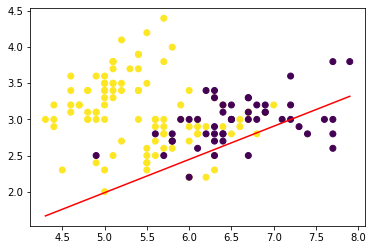

Iteration = 6000
Model = [0.3378556974456933, -0.4924796544498026, 1.0441751478666126]


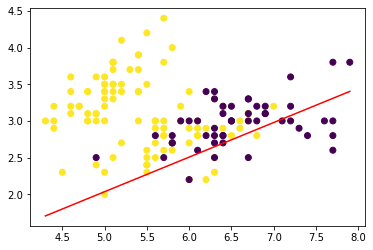

Iteration = 7000
Model = [0.38376591791469084, -0.5515811430359756, 1.148134313181247]


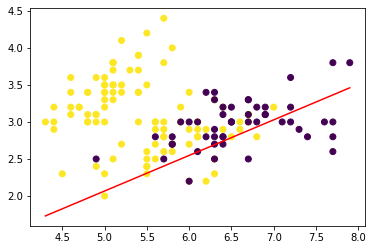

Iteration = 8000
Model = [0.4281365339582466, -0.6047726563690015, 1.2410796352097149]


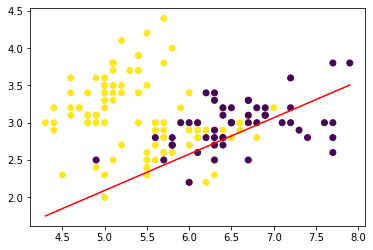

Iteration = 9000
Model = [0.4711649853976555, -0.6529363665072708, 1.3246026486082685]


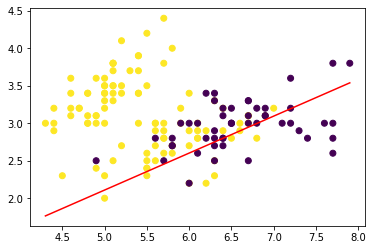

Iteration = 15000
Model = [0.708655725959876, -0.8684899269683511, 1.6867253088301712]


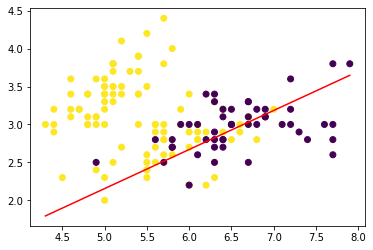

Iteration = 20000
Model = [0.8883809313306109, -0.9883715551723448, 1.874177450409393]


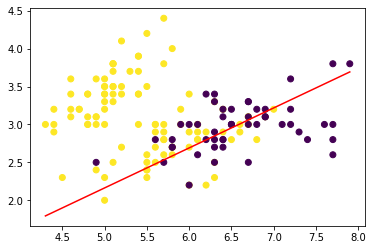

Iteration = 25000
Model = [1.0575268601616672, -1.0771902533944493, 2.0016895233543464]


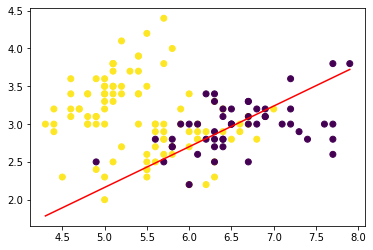

Iteration = 30000
Model = [1.2189815864618654, -1.1457307241018952, 2.090003500334828]


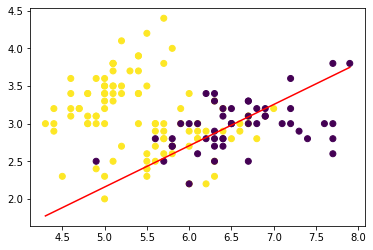

Iteration = 35000
Model = [1.3744708064856703, -1.2002530626145829, 2.1512821552487753]


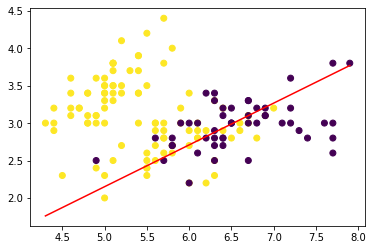

Iteration = 40000
Model = [1.5251035163206186, -1.2446880577601216, 2.1932172501107723]


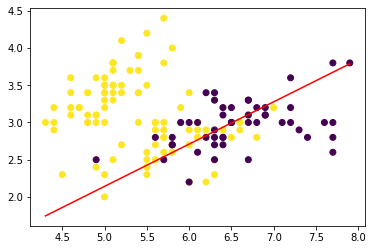

Iteration = 45000
Model = [1.671632776528388, -1.2816495423203258, 2.220949472471636]


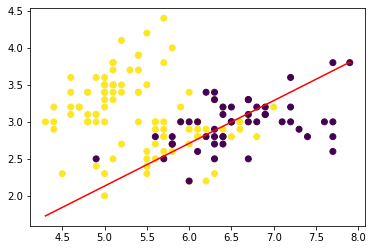

Iteration = 50000
Model = [1.8145924631797035, -1.312951790951763, 2.238059659808694]


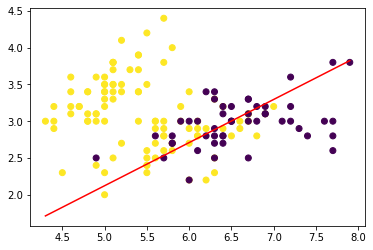

Iteration = 55000
Model = [1.9543744432456327, -1.3398959707287885, 2.24712196360046]


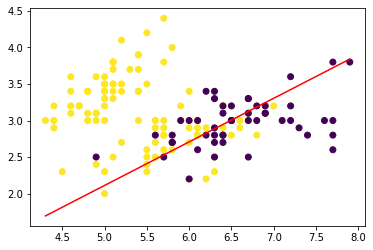

Iteration = 60000
Model = [2.091274773795195, -1.3634391730578381, 2.2500323803651]


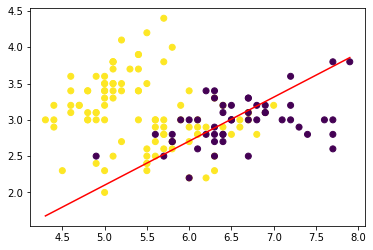

Iteration = 65000
Model = [2.2255227226365686, -1.384299474574664, 2.248214045298951]


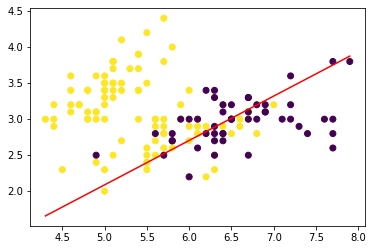

Iteration = 70000
Model = [2.3572997391477566, -1.4030241055199253, 2.2427510409006945]


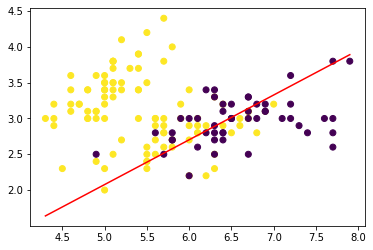

Iteration = 75000
Model = [2.4867522751197297, -1.420035301991284, 2.234478751164567]


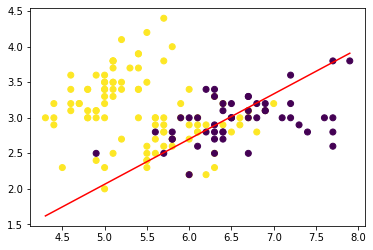

Iteration = 80000
Model = [2.6140006948502954, -1.4356620989155424, 2.224046722504284]


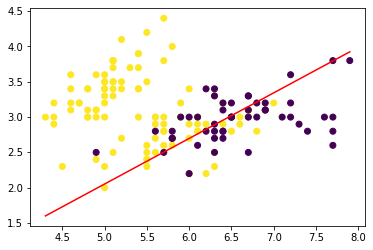

Iteration = 85000
Model = [2.7391456148359463, -1.4501629491229624, 2.211963517854692]


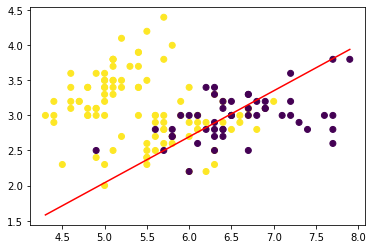

Iteration = 90000
Model = [2.8622725049251843, -1.4637421704368603, 2.198629416065674]


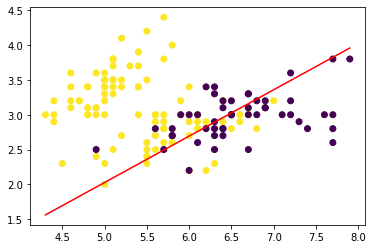

Iteration = 95000
Model = [2.9834550839191754, -1.4765621276943652, 2.1843606870506753]


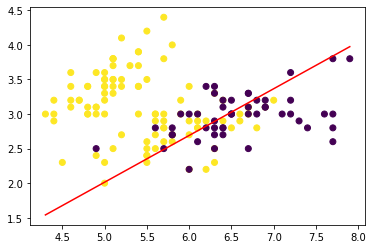

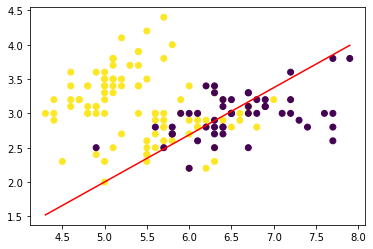

Error = 14.656864694943001
Total iterations = 100000
Model = [3.1027341843650302, -1.488750014985604, 2.1694109361111424]


In [251]:
model_third = logistic_main(to_binary_third(data_4), [0,0,0], 0.001)
print("Model =", model_third)

# All Sets of Data


## Testing Data
### Training Data 1 (No Noise):
[((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]

### Training Data 2 (Noise):
[((1, -2), 6.39), ((1, -1), 16.51), ((1, 0), -3.11), ((1, 1), 10.79), ((1, 2), 11.62), ((1, 3), 23.24), ((1, 4), 18.27), ((1, 5), 27.58), ((1, 6), 22.21), ((1, 7), 5.12), ((1, 8), 8.86), ((1, 9), 10.69), ((1, 10), 14.82)]

# Data sets from logistic regression
Training Data 1:
###[((1, 0, 0), 1), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 1), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 0), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]
Training Data 2: 
###[((1, 0, 0), 0), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 0), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 1), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]
Training Data 3: 
###[((1, 2, 7), 0), ((1, 19, 72), 0), ((1, -39, -20), 0), ((1, 86, 95), 1), ((1, 45, 37), 1), ((1, 52, -23), 1), ((1, -8, -8), 0), ((1, 67, 93), 1), ((1, 46, 21), 1), ((1, 18, -97), 1), ((1, -78, 70), 0), ((1, -9, -17), 1), ((1, 94, -40), 1), ((1, 11, -3), 1), ((1, -24, -59), 1), ((1, 25, 33), 1), ((1, -71, 23), 0), ((1, -34, -7), 0), ((1, 55, -3), 1), ((1, -5, -33), 1), ((1, -22, 38), 0), ((1, 94, 66), 1), ((1, 4, -89), 1), ((1, -9, 26), 0), ((1, -83, 61), 0), ((1, 19, 98), 0), ((1, -1, 55), 0), ((1, -43, 90), 0), ((1, 86, 27), 1), ((1, 24, 69), 0)]
Training Data 4: Learn to Classify 0 versus 1 or 2
###[((1, 5.1, 3.5), 0), ((1, 4.9, 3.0), 0), ((1, 4.7, 3.2), 0), ((1, 4.6, 3.1), 0), ((1, 5.0, 3.6), 0), ((1, 5.4, 3.9), 0), ((1, 4.6, 3.4), 0), ((1, 5.0, 3.4), 0), ((1, 4.4, 2.9), 0), ((1, 4.9, 3.1), 0), ((1, 5.4, 3.7), 0), ((1, 4.8, 3.4), 0), ((1, 4.8, 3.0), 0), ((1, 4.3, 3.0), 0), ((1, 5.8, 4.0), 0), ((1, 5.7, 4.4), 0), ((1, 5.4, 3.9), 0), ((1, 5.1, 3.5), 0), ((1, 5.7, 3.8), 0), ((1, 5.1, 3.8), 0), ((1, 5.4, 3.4), 0), ((1, 5.1, 3.7), 0), ((1, 4.6, 3.6), 0), ((1, 5.1, 3.3), 0), ((1, 4.8, 3.4), 0), ((1, 5.0, 3.0), 0), ((1, 5.0, 3.4), 0), ((1, 5.2, 3.5), 0), ((1, 5.2, 3.4), 0), ((1, 4.7, 3.2), 0), ((1, 4.8, 3.1), 0), ((1, 5.4, 3.4), 0), ((1, 5.2, 4.1), 0), ((1, 5.5, 4.2), 0), ((1, 4.9, 3.1), 0), ((1, 5.0, 3.2), 0), ((1, 5.5, 3.5), 0), ((1, 4.9, 3.6), 0), ((1, 4.4, 3.0), 0), ((1, 5.1, 3.4), 0), ((1, 5.0, 3.5), 0), ((1, 4.5, 2.3), 0), ((1, 4.4, 3.2), 0), ((1, 5.0, 3.5), 0), ((1, 5.1, 3.8), 0), ((1, 4.8, 3.0), 0), ((1, 5.1, 3.8), 0), ((1, 4.6, 3.2), 0), ((1, 5.3, 3.7), 0), ((1, 5.0, 3.3), 0), ((1, 7.0, 3.2), 1), ((1, 6.4, 3.2), 1), ((1, 6.9, 3.1), 1), ((1, 5.5, 2.3), 1), ((1, 6.5, 2.8), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 1), ((1, 4.9, 2.4), 1), ((1, 6.6, 2.9), 1), ((1, 5.2, 2.7), 1), ((1, 5.0, 2.0), 1), ((1, 5.9, 3.0), 1), ((1, 6.0, 2.2), 1), ((1, 6.1, 2.9), 1), ((1, 5.6, 2.9), 1), ((1, 6.7, 3.1), 1), ((1, 5.6, 3.0), 1), ((1, 5.8, 2.7), 1), ((1, 6.2, 2.2), 1), ((1, 5.6, 2.5), 1), ((1, 5.9, 3.2), 1), ((1, 6.1, 2.8), 1), ((1, 6.3, 2.5), 1), ((1, 6.1, 2.8), 1), ((1, 6.4, 2.9), 1), ((1, 6.6, 3.0), 1), ((1, 6.8, 2.8), 1), ((1, 6.7, 3.0), 1), ((1, 6.0, 2.9), 1), ((1, 5.7, 2.6), 1), ((1, 5.5, 2.4), 1), ((1, 5.5, 2.4), 1), ((1, 5.8, 2.7), 1), ((1, 6.0, 2.7), 1), ((1, 5.4, 3.0), 1), ((1, 6.0, 3.4), 1), ((1, 6.7, 3.1), 1), ((1, 6.3, 2.3), 1), ((1, 5.6, 3.0), 1), ((1, 5.5, 2.5), 1), ((1, 5.5, 2.6), 1), ((1, 6.1, 3.0), 1), ((1, 5.8, 2.6), 1), ((1, 5.0, 2.3), 1), ((1, 5.6, 2.7), 1), ((1, 5.7, 3.0), 1), ((1, 5.7, 2.9), 1), ((1, 6.2, 2.9), 1), ((1, 5.1, 2.5), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 2), ((1, 5.8, 2.7), 2), ((1, 7.1, 3.0), 2), ((1, 6.3, 2.9), 2), ((1, 6.5, 3.0), 2), ((1, 7.6, 3.0), 2), ((1, 4.9, 2.5), 2), ((1, 7.3, 2.9), 2), ((1, 6.7, 2.5), 2), ((1, 7.2, 3.6), 2), ((1, 6.5, 3.2), 2), ((1, 6.4, 2.7), 2), ((1, 6.8, 3.0), 2), ((1, 5.7, 2.5), 2), ((1, 5.8, 2.8), 2), ((1, 6.4, 3.2), 2), ((1, 6.5, 3.0), 2), ((1, 7.7, 3.8), 2), ((1, 7.7, 2.6), 2), ((1, 6.0, 2.2), 2), ((1, 6.9, 3.2), 2), ((1, 5.6, 2.8), 2), ((1, 7.7, 2.8), 2), ((1, 6.3, 2.7), 2), ((1, 6.7, 3.3), 2), ((1, 7.2, 3.2), 2), ((1, 6.2, 2.8), 2), ((1, 6.1, 3.0), 2), ((1, 6.4, 2.8), 2), ((1, 7.2, 3.0), 2), ((1, 7.4, 2.8), 2), ((1, 7.9, 3.8), 2), ((1, 6.4, 2.8), 2), ((1, 6.3, 2.8), 2), ((1, 6.1, 2.6), 2), ((1, 7.7, 3.0), 2), ((1, 6.3, 3.4), 2), ((1, 6.4, 3.1), 2), ((1, 6.0, 3.0), 2), ((1, 6.9, 3.1), 2), ((1, 6.7, 3.1), 2), ((1, 6.9, 3.1), 2), ((1, 5.8, 2.7), 2), ((1, 6.8, 3.2), 2), ((1, 6.7, 3.3), 2), ((1, 6.7, 3.0), 2), ((1, 6.3, 2.5), 2), ((1, 6.5, 3.0), 2), ((1, 6.2, 3.4), 2), ((1, 5.9, 3.0), 2)]

# Iris Data

### Importing data from sklearn along with algorithms

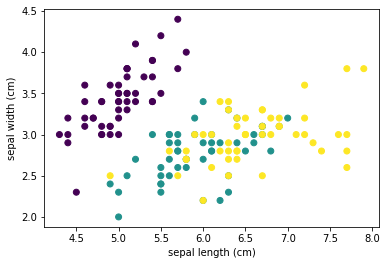

Accuracy = 0.9736842105263158
Accuracy = 0.9736842105263158


In [252]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
iris = load_iris()

features = iris.data.T

sepal_length = features[0]
sepal_width = features[1]
petal_length = features[2]


sepal_length_label = iris.feature_names[0]
sepal_width_label = iris.feature_names[1]

plt.scatter(sepal_length, sepal_width, c=iris.target)
plt.xlabel(sepal_length_label)
plt.ylabel(sepal_width_label)
plt.show()

x_training, x_testing, y_training, y_testing = train_test_split(iris['data'], iris['target'], random_state = 0)
KNN = KNeighborsClassifier(n_neighbors=1)

KNN.fit(x_training, y_training)

x_new = np.array([[5.0, 2.8, 1.0, 0.2]])

predict = KNN.predict(x_new)

print("Accuracy =", KNN.score(x_testing, y_testing))

model = LogisticRegression(max_iter=10000)
model.fit(x_training, y_training)
print("Accuracy =", model.score(x_testing, y_testing))
